<a href="https://colab.research.google.com/github/difinative/k8-performance-check/blob/main/SanuAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip /content/datas.zip -d /content/data

Archive:  /content/datas.zip
  inflating: /content/data/json/AB_20231109085452.json  
  inflating: /content/data/json/AB_20231109102131.json  
  inflating: /content/data/json/AB_20231109103355.json  
  inflating: /content/data/json/AB_20231109103717.json  
  inflating: /content/data/json/AB_20231109104555.json  
  inflating: /content/data/json/AB_20231109105433.json  
  inflating: /content/data/json/AB_20231109110253.json  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import json
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_data(folder_path):
    data_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data_list.extend(json.load(file))
    return data_list

def manhattan_distance(query_vector, data_list):
    distance_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        distance = np.sum(np.abs(query_vector - feature_vector))
        distance_scores.append((item, distance))
    return sorted(distance_scores, key=lambda x: x[1])

def vector_search(query_vector, data_list):
    similarity_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        similarity = cosine_similarity([query_vector], [feature_vector])[0][0]
        similarity_scores.append((item, similarity))
    return sorted(similarity_scores, key=lambda x: x[1], reverse=True)

def pearson_correlation(query_vector, data_list):
    correlation_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        correlation = np.corrcoef(query_vector, feature_vector)[0, 1]
        correlation_scores.append((item, correlation))
    return sorted(correlation_scores, key=lambda x: x[1], reverse=True)

def euclidean_distance(query_vector, data_list):
    distance_scores = []
    for item in data_list:
        feature_vector = np.array(item["Feature Vector"])
        distance = np.linalg.norm(query_vector - feature_vector)
        distance_scores.append((item, distance))
    return sorted(distance_scores, key=lambda x: x[1])

def perform_vector_search(folder_path, query_vector, top_results=10):
    all_data = load_data(folder_path)
    results = euclidean_distance(query_vector, all_data)


    # Print the top results
    #for result in results[:top_results]:
        #print(f"Similarity: {result[1]}, Original Text: {result[0]['Original Text']}")
    # Print the top results
    for result in results[:top_results]:
        print(f"Distance: {result[1]}, Original Text: {result[0]['Original Text']}")


In [5]:
!pip install easyocr

Default recognition model loaded successfully for English.
Image read successfully.


Feature Vector: [0.11372862011194229, 2.5700273513793945, 0.37650641798973083, 0.046639230102300644, 0.007623760029673576, 0.020709289237856865, 0.3759565055370331, 0.010486222803592682, 1.4862722158432007, 0.5991055369377136, 0.023348405957221985, 0.17765948176383972, 0.15710335969924927, 0.1460045725107193, 0.17035312950611115, 0.0020612357184290886, 0.38100966811180115, 0.05405164137482643, 0.012944407761096954, 0.04416274651885033, 0.11795264482498169, 0.05855986848473549, 0.05362754315137863, 1.0284124612808228, 0.1987195760011673, 0.1314033567905426, 0.008818769827485085, 0.03796180337667465, 0.19995062053203583, 0.3245790898799896, 0.07384708523750305, 0.8437466025352478, 0.0, 0.003923955373466015, 0.223410964012146, 0.1704932451248169, 0.015533988364040852, 0.06765817105770111, 0.024618951603770256, 1.1602565050125122, 0.4384761452674866, 0.15111947059631348, 0.36644768714904785, 0.043135687708854675, 0.03682652860879898, 0.5388143658638, 0.25813478231430054, 0.8616781234741211

Feature Vector: [0.8861262202262878, 2.3637144565582275, 0.016273466870188713, 0.0, 0.03171553835272789, 0.6581370830535889, 0.3390151560306549, 0.0, 1.5661462545394897, 0.1050499975681305, 0.007834728807210922, 0.73996502161026, 0.25845956802368164, 0.002665204694494605, 0.24595756828784943, 0.0014656727435067296, 0.12298174202442169, 0.03436950594186783, 0.3105159401893616, 0.0012635509483516216, 0.06653077155351639, 0.06553899496793747, 0.17582140862941742, 1.9583054780960083, 0.4431115686893463, 0.15046554803848267, 0.07615330815315247, 0.20562905073165894, 0.0012089988449588418, 0.2727672755718231, 0.6353370547294617, 1.1907026767730713, 0.18271823227405548, 0.3835195302963257, 0.5266668200492859, 0.18238061666488647, 0.2119070291519165, 0.3113299608230591, 0.016306156292557716, 0.5202493667602539, 1.0193424224853516, 0.22764867544174194, 0.17717379331588745, 0.0018862440483644605, 0.034218285232782364, 0.36892348527908325, 0.27576321363449097, 1.5370700359344482, 0.03385424241423

Feature Vector: [0.1816636472940445, 2.7526116371154785, 0.026812376454472542, 0.0, 0.35014066100120544, 0.5554717183113098, 0.22989770770072937, 0.013935412280261517, 0.9771621227264404, 0.09528946131467819, 0.02482348121702671, 0.1423736810684204, 0.20123057067394257, 0.013012826442718506, 0.13245165348052979, 0.024893751367926598, 0.3265571892261505, 0.05286576226353645, 0.0756194144487381, 0.04888100177049637, 0.020837582647800446, 0.06862146407365799, 0.05124310031533241, 1.0216004848480225, 0.12728089094161987, 0.22874781489372253, 0.06363473832607269, 0.5580862164497375, 0.025090742856264114, 0.16469013690948486, 0.2397230714559555, 0.7114360332489014, 0.15280242264270782, 0.12619076669216156, 0.08065779507160187, 0.08091379702091217, 0.10500653833150864, 0.21379660069942474, 0.044306278228759766, 0.6842048168182373, 0.895679235458374, 0.06410257518291473, 0.1615789234638214, 0.02302168309688568, 0.05470017343759537, 0.33793675899505615, 0.43713438510894775, 0.8852388262748718, 

Feature Vector: [0.6205330491065979, 1.9072726964950562, 0.24756799638271332, 0.00766298221424222, 0.3779400885105133, 0.5650493502616882, 0.5483264923095703, 0.021012257784605026, 1.3152971267700195, 0.31139490008354187, 0.01302937138825655, 0.19278159737586975, 0.14478951692581177, 0.14338991045951843, 0.37705183029174805, 0.1871284395456314, 0.18152809143066406, 0.01288015116006136, 0.31579411029815674, 0.011672213673591614, 0.18949653208255768, 0.3164593577384949, 0.04148893058300018, 1.4357967376708984, 0.1550855189561844, 0.138048455119133, 0.18937364220619202, 0.20705707371234894, 0.055522430688142776, 0.045649413019418716, 0.3618544042110443, 0.7263038754463196, 0.10766385495662689, 0.15926575660705566, 0.5001315474510193, 0.032095909118652344, 0.42363297939300537, 0.21177470684051514, 0.10771646350622177, 0.20294944941997528, 0.792783260345459, 0.17741213738918304, 0.10585466027259827, 0.008213815279304981, 0.009485219605267048, 0.41737666726112366, 0.22272637486457825, 1.4237

Feature Vector: [0.374034583568573, 3.07574462890625, 0.07667820900678635, 0.006578886415809393, 0.23742763698101044, 0.39521750807762146, 0.2533169984817505, 0.03581499680876732, 0.7197168469429016, 0.05988137423992157, 0.023247338831424713, 0.23353329300880432, 0.08774996548891068, 0.036733321845531464, 0.18054725229740143, 0.020134124904870987, 0.4107854664325714, 0.01235816441476345, 0.035425905138254166, 0.03216460347175598, 0.03807862102985382, 0.18622931838035583, 0.014458590187132359, 1.8779164552688599, 0.18134821951389313, 0.15338636934757233, 0.057098012417554855, 0.09266812354326248, 0.13292944431304932, 0.11883294582366943, 0.3366817533969879, 1.1704810857772827, 0.06330935657024384, 0.10555996000766754, 0.09948679059743881, 0.011909338645637035, 0.09849659353494644, 0.27630630135536194, 0.045676443725824356, 0.6580233573913574, 0.742539644241333, 0.12539558112621307, 0.17586271464824677, 0.022460903972387314, 0.020438306033611298, 0.5542712211608887, 0.21313056349754333, 

Feature Vector: [0.6387332081794739, 2.9428117275238037, 0.19047005474567413, 0.007311072666198015, 0.10457731783390045, 0.41240543127059937, 0.5465536713600159, 0.0, 1.4075226783752441, 0.23162174224853516, 0.08893901109695435, 0.8511550426483154, 0.07282674312591553, 0.02445307746529579, 0.42694056034088135, 0.007795725483447313, 0.1834041178226471, 0.08525095880031586, 0.06231233850121498, 0.05813911557197571, 0.21542002260684967, 0.03094201162457466, 0.14391814172267914, 1.7461706399917603, 0.5302367210388184, 0.05892163887619972, 0.08671865612268448, 0.34953564405441284, 0.14674583077430725, 0.2691318988800049, 0.7928691506385803, 1.2336325645446777, 0.059292931109666824, 0.1728077083826065, 0.5883016586303711, 0.06739634275436401, 0.14470411837100983, 0.7110315561294556, 0.1341855525970459, 0.5538536906242371, 0.4109284281730652, 0.12214440852403641, 0.184744730591774, 0.028744162991642952, 0.016655849292874336, 0.40441879630088806, 0.36226794123649597, 1.6044048070907593, 0.0040

Feature Vector: [0.38689082860946655, 2.527912139892578, 0.14340826869010925, 0.10680271685123444, 0.06288871169090271, 0.53690105676651, 0.1256677508354187, 0.0, 0.699396550655365, 0.21146197617053986, 0.0065368786454200745, 0.29166749119758606, 0.05081244558095932, 0.011218352243304253, 0.17270280420780182, 0.005154086742550135, 0.18318219482898712, 0.04886379465460777, 0.34220293164253235, 0.08821763098239899, 0.05992141366004944, 0.22912214696407318, 0.15229184925556183, 1.1226460933685303, 0.29075124859809875, 0.07747013121843338, 0.022207975387573242, 0.13929292559623718, 0.059975095093250275, 0.15386122465133667, 0.4930092990398407, 1.0543887615203857, 0.045699138194322586, 0.3202427327632904, 0.184075728058815, 0.045060791075229645, 0.28418877720832825, 0.23852795362472534, 0.01636025682091713, 0.2203700989484787, 0.43701592087745667, 0.14063256978988647, 0.34553807973861694, 0.019638901576399803, 0.09949483722448349, 0.47532880306243896, 0.33099743723869324, 0.7153487801551819

Feature Vector: [0.7737940549850464, 0.4176260530948639, 0.14560356736183167, 0.11386862397193909, 0.13429203629493713, 0.15524163842201233, 0.16899743676185608, 0.014393993653357029, 1.645198106765747, 0.1658698171377182, 0.015934189781546593, 0.03950182721018791, 0.08266407251358032, 0.009591031819581985, 0.10846632719039917, 0.022868767380714417, 0.007749686483293772, 0.1348038762807846, 0.2817910313606262, 0.036633025854825974, 0.3360065519809723, 0.4380059540271759, 0.3377613127231598, 1.4714003801345825, 0.3731183111667633, 0.1161673441529274, 0.06919613480567932, 0.5299198627471924, 0.31265074014663696, 1.1411335468292236, 0.2026728242635727, 0.6922984719276428, 0.023680727928876877, 0.026704614982008934, 0.9734914898872375, 0.27919620275497437, 0.08152376115322113, 0.13467757403850555, 0.19216933846473694, 0.428634375333786, 0.19467760622501373, 0.0897388681769371, 0.468790203332901, 0.29841071367263794, 0.06690068542957306, 0.5630472898483276, 0.30155137181282043, 1.2874989509

Feature Vector: [0.34811437129974365, 4.064095973968506, 0.0570620559155941, 0.0014075059443712234, 0.0987263023853302, 0.29824763536453247, 0.1381075233221054, 0.007211888208985329, 0.5012131929397583, 0.03556564450263977, 0.022894039750099182, 0.3073544502258301, 0.18247635662555695, 0.008496400900185108, 0.0912124291062355, 0.027876712381839752, 0.3559369742870331, 0.024372046813368797, 0.16448670625686646, 0.040170107036828995, 0.03386283293366432, 0.0, 0.024853430688381195, 1.1253279447555542, 0.4991401433944702, 0.21379365026950836, 0.056627653539180756, 0.15205638110637665, 0.059675056487321854, 0.1563529670238495, 0.18679264187812805, 1.433890461921692, 0.06926581263542175, 0.12985949218273163, 0.03246822953224182, 0.026388032361865044, 0.0726000964641571, 0.45291152596473694, 0.01623561605811119, 0.6065911054611206, 0.5542664527893066, 0.13567249476909637, 0.2068449854850769, 0.03697745129466057, 0.07446043193340302, 0.2993774116039276, 0.24743621051311493, 0.47261252999305725

Feature Vector: [0.9039768576622009, 2.919508218765259, 0.17624498903751373, 0.011003952473402023, 0.32272869348526, 0.9069284200668335, 0.10658172518014908, 0.016265416517853737, 0.938160240650177, 0.10917235165834427, 0.0342797115445137, 0.3392740488052368, 0.07461868226528168, 0.06953123956918716, 0.1462114453315735, 0.049861785024404526, 0.3523090183734894, 0.007248351816087961, 0.20325811207294464, 0.1354779601097107, 0.04833609238266945, 0.19646039605140686, 0.007560536731034517, 1.6669811010360718, 0.48699989914894104, 0.2064231038093567, 0.07271403074264526, 0.23959921300411224, 0.031347330659627914, 0.043538857251405716, 0.28671956062316895, 0.8920965194702148, 0.09356353431940079, 0.05201350525021553, 0.08622616529464722, 0.037317708134651184, 0.2119539976119995, 0.36273691058158875, 0.09304362535476685, 0.19434666633605957, 0.9617972373962402, 0.3254961371421814, 0.05119765177369118, 0.04456798732280731, 0.029177799820899963, 0.55971759557724, 0.15514734387397766, 0.76811647

Feature Vector: [0.3416142463684082, 2.166544198989868, 0.25762683153152466, 0.015550803393125534, 0.11883856356143951, 0.49393919110298157, 0.3795369267463684, 0.008509884588420391, 0.8072710633277893, 0.17116031050682068, 0.004769794177263975, 0.12016420811414719, 0.09761536121368408, 0.026770740747451782, 0.2334572672843933, 0.00770564517006278, 0.1465246081352234, 0.030311640352010727, 0.17998270690441132, 0.07859132438898087, 0.04448458552360535, 0.09622414410114288, 0.1925475001335144, 1.3141478300094604, 0.2582055926322937, 0.09963974356651306, 0.2256816178560257, 0.09521820396184921, 0.1366448551416397, 0.13672728836536407, 0.2537373900413513, 1.4297481775283813, 0.08977289497852325, 0.22828686237335205, 0.3391666114330292, 0.012696062214672565, 0.099344402551651, 0.2422761172056198, 0.046296488493680954, 0.5740773677825928, 0.7273956537246704, 0.08694034814834595, 0.26734602451324463, 0.008736790157854557, 0.036536309868097305, 0.5769721865653992, 0.22098380327224731, 0.829281

Feature Vector: [0.8413691520690918, 1.3050638437271118, 0.2692967653274536, 0.01690705679357052, 0.05715997889637947, 0.38377025723457336, 0.630742073059082, 0.0, 1.887656331062317, 0.3662288188934326, 0.025784721598029137, 0.3085956275463104, 0.14924947917461395, 0.0341440811753273, 0.157793328166008, 0.026519061997532845, 0.06074181944131851, 0.06106260046362877, 0.3246175944805145, 0.01893577165901661, 0.2060936540365219, 0.1567779779434204, 0.30941638350486755, 1.2867977619171143, 0.14224779605865479, 0.09308592230081558, 0.14716197550296783, 0.14035417139530182, 0.03962818905711174, 0.20097263157367706, 0.43002820014953613, 1.0781009197235107, 0.14907513558864594, 0.08797169476747513, 0.5680086016654968, 0.026102345436811447, 0.09436248242855072, 0.41161054372787476, 0.0030029427725821733, 0.38067978620529175, 0.7375428080558777, 0.30062469840049744, 0.23471808433532715, 0.05074559524655342, 0.11947856843471527, 0.30644336342811584, 0.3593504726886749, 1.074344515800476, 0.026779

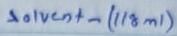

Feature Vector: [0.45965996384620667, 1.3459089994430542, 0.1190900206565857, 0.030477430671453476, 0.18833942711353302, 0.4721260964870453, 0.242951899766922, 0.040241140872240067, 0.6974784731864929, 0.08170963078737259, 0.012547663412988186, 0.326601505279541, 0.30670779943466187, 0.1912519931793213, 0.27684929966926575, 0.3135526478290558, 0.039689935743808746, 0.053793322294950485, 0.7350415587425232, 0.1352473795413971, 0.17691104114055634, 0.7116859555244446, 0.13682593405246735, 1.4131625890731812, 0.07049639523029327, 0.2065695971250534, 0.10560332238674164, 0.17987488210201263, 0.07699577510356903, 0.014407837763428688, 0.7676569223403931, 0.46903547644615173, 0.07809098809957504, 0.1775098294019699, 1.130346417427063, 0.04908101260662079, 0.32194784283638, 0.037313930690288544, 0.08664770424365997, 0.15891222655773163, 0.23832035064697266, 0.10630972683429718, 0.2055240422487259, 0.00021676158939953893, 0.04504063352942467, 0.2864752411842346, 0.28168681263923645, 1.07935988

Feature Vector: [0.9959708452224731, 0.7273019552230835, 0.3702833950519562, 0.016745973378419876, 0.07302810996770859, 0.033584415912628174, 0.8685756325721741, 0.3196386992931366, 1.6681883335113525, 0.14770621061325073, 0.008198190480470657, 0.20895913243293762, 0.07461616396903992, 0.06954731792211533, 0.2513948976993561, 0.020185045897960663, 0.12467449903488159, 0.10030072927474976, 0.12097180634737015, 0.2262776494026184, 0.3584427237510681, 0.27215075492858887, 0.18349429965019226, 0.6357605457305908, 0.456430584192276, 0.1330202966928482, 0.21936166286468506, 0.7734321355819702, 0.04797540232539177, 0.9479007124900818, 0.03733544051647186, 1.2813985347747803, 0.35112759470939636, 0.055013351142406464, 0.9743363261222839, 0.0262982789427042, 0.14234480261802673, 0.13118895888328552, 0.12048531323671341, 0.2618020474910736, 0.3771938383579254, 0.09388262033462524, 0.4104914367198944, 0.39155328273773193, 0.058035705238580704, 0.40017715096473694, 0.24510115385055542, 1.447862744

Feature Vector: [0.2729176878929138, 2.8590168952941895, 0.026523414999246597, 0.0, 0.28346002101898193, 0.27578243613243103, 0.09452159702777863, 0.021288074553012848, 0.7748890519142151, 0.029132435098290443, 0.0016462018247693777, 0.32269352674484253, 0.03777885064482689, 0.03619827330112457, 0.15895193815231323, 0.020692719146609306, 0.2953958213329315, 0.06302785128355026, 0.234988272190094, 0.04185197129845619, 0.09001917392015457, 0.001966214505955577, 0.19941715896129608, 1.6160633563995361, 0.28784477710723877, 0.5005946755409241, 0.023374883458018303, 0.09979146718978882, 0.14146125316619873, 0.14360471069812775, 0.18119555711746216, 1.397167444229126, 0.1851438730955124, 0.05356450006365776, 0.152839794754982, 0.1377910077571869, 0.04261372983455658, 0.4694700539112091, 0.07674834877252579, 0.7951467633247375, 0.6855039000511169, 0.09246717393398285, 0.241032212972641, 0.03384750336408615, 0.03678349405527115, 0.4799235463142395, 0.1670236736536026, 0.9129327535629272, 0.022

Feature Vector: [0.7630916237831116, 2.8227596282958984, 0.2189403772354126, 0.04764242470264435, 0.46937140822410583, 0.9646305441856384, 0.40488919615745544, 0.004961286671459675, 1.0191504955291748, 0.14209532737731934, 0.054942961782217026, 0.5149695873260498, 0.02050068974494934, 0.020079873502254486, 0.2782197594642639, 0.04796105995774269, 0.4268244504928589, 0.01345883123576641, 0.08733925223350525, 0.061409708112478256, 0.13689199090003967, 0.14091865718364716, 0.026376359164714813, 1.9483842849731445, 0.07507866621017456, 0.15292343497276306, 0.016709493473172188, 0.35070139169692993, 0.1302911788225174, 0.08887462317943573, 0.3309999704360962, 0.9139852523803711, 0.06871489435434341, 0.016336211934685707, 0.23243948817253113, 0.039826538413763046, 0.5203601121902466, 0.31948035955429077, 0.15447446703910828, 0.512976884841919, 0.8944709300994873, 0.25021892786026, 0.11564496159553528, 0.0851297378540039, 0.033556610345840454, 0.5173820853233337, 0.2852638065814972, 0.8892842

Feature Vector: [0.2308340221643448, 2.9977939128875732, 0.11443113535642624, 0.0001659098343225196, 0.12973758578300476, 0.18258365988731384, 0.2826484739780426, 0.0252101831138134, 1.4125903844833374, 0.3745838403701782, 0.09613870084285736, 0.23797708749771118, 0.07492170482873917, 3.295893475296907e-05, 0.10230433940887451, 0.008017740212380886, 0.20629647374153137, 0.04133037477731705, 0.06012366712093353, 0.0564672127366066, 0.07611303776502609, 0.1738428771495819, 0.012573773972690105, 0.9222164750099182, 0.3188254237174988, 0.1979176253080368, 0.012620581313967705, 0.20787151157855988, 0.0418107770383358, 0.17071698606014252, 0.14915116131305695, 1.0307424068450928, 0.05100496485829353, 0.019495338201522827, 0.13107794523239136, 0.026781637221574783, 0.0694604441523552, 0.152553528547287, 0.1310834437608719, 0.39221295714378357, 0.47115832567214966, 0.1407412737607956, 0.32678282260894775, 0.02865622565150261, 0.0855843648314476, 0.47124210000038147, 0.1884210705757141, 0.82780

Feature Vector: [0.6597880125045776, 2.4856605529785156, 0.12158308923244476, 0.038539040833711624, 0.6050208806991577, 0.45885738730430603, 0.5119785070419312, 0.05792681872844696, 0.524268627166748, 0.12446711212396622, 0.023981403559446335, 0.3283098638057709, 0.07371781021356583, 0.01563863456249237, 0.25805845856666565, 0.08263971656560898, 0.34406203031539917, 0.006350310519337654, 0.12149678170681, 0.08611101657152176, 0.1469956338405609, 0.15483038127422333, 0.07430002093315125, 1.5008107423782349, 0.258978933095932, 0.06812617182731628, 0.11438151448965073, 0.37019580602645874, 0.028756029903888702, 0.040149860084056854, 0.6575323343276978, 0.8823041319847107, 0.2564127445220947, 0.14527127146720886, 0.15067102015018463, 0.00564576918259263, 0.41459617018699646, 0.16245213150978088, 0.18863309919834137, 0.3589209020137787, 0.7641061544418335, 0.13700951635837555, 0.26219484210014343, 0.0028182587120682, 0.010495154187083244, 0.23428820073604584, 0.08589538931846619, 1.52319860

Feature Vector: [0.5645812153816223, 0.854245662689209, 0.20161786675453186, 0.03329433500766754, 0.08607552200555801, 0.04897169768810272, 0.8348187208175659, 0.0322774313390255, 1.0845129489898682, 0.21084646880626678, 0.008205192163586617, 0.15060369670391083, 0.28802353143692017, 0.31480923295021057, 0.3378749489784241, 0.01982494443655014, 0.22422662377357483, 0.2069869339466095, 0.06936075538396835, 0.028774166479706764, 0.19470825791358948, 0.314973384141922, 0.045979589223861694, 1.6330748796463013, 0.10786538571119308, 0.17369239032268524, 0.36983147263526917, 0.06088729202747345, 0.5648602247238159, 0.7639620900154114, 0.10585938394069672, 1.3523569107055664, 0.060418449342250824, 0.18448954820632935, 0.8400536179542542, 0.15049010515213013, 0.0036448570899665356, 0.27216818928718567, 0.08438915014266968, 0.7009740471839905, 0.43508389592170715, 0.053873028606176376, 0.31545597314834595, 0.15485408902168274, 0.06212896853685379, 0.512928307056427, 0.03715057671070099, 1.78864

Feature Vector: [0.5699571967124939, 2.1530115604400635, 0.16375291347503662, 0.0, 0.32198312878608704, 0.33617669343948364, 0.4654592275619507, 0.026946138590574265, 0.8697050213813782, 0.14645446836948395, 0.005873079411685467, 0.20656292140483856, 0.1290498971939087, 0.014968481846153736, 0.1984986811876297, 0.11793705075979233, 0.09216035902500153, 0.023680737242102623, 0.2647327482700348, 0.07859701663255692, 0.09651709347963333, 0.06876689195632935, 0.07541003823280334, 1.3086894750595093, 0.23310767114162445, 0.1376315802335739, 0.05304693803191185, 0.1450006663799286, 0.013876063749194145, 0.10667480528354645, 0.7522534728050232, 0.7379320859909058, 0.06203475221991539, 0.2104470431804657, 0.37546756863594055, 0.0028726370073854923, 0.19422277808189392, 0.29024145007133484, 0.07419773936271667, 0.20975856482982635, 0.5226637721061707, 0.300310879945755, 0.28928613662719727, 0.009845896624028683, 0.0812840387225151, 0.42466580867767334, 0.15880833566188812, 1.4538313150405884, 0

Feature Vector: [0.3442867398262024, 2.364018201828003, 0.1043061837553978, 0.0700574517250061, 0.03103732503950596, 0.4872170388698578, 0.30718645453453064, 0.02567649818956852, 1.235109567642212, 0.3511867821216583, 0.07423410564661026, 0.4220404028892517, 0.12401121854782104, 3.403760274522938e-05, 0.20914827287197113, 0.028954697772860527, 0.4915217161178589, 0.03404860943555832, 0.0899961069226265, 0.08414945751428604, 0.11660934239625931, 0.026058310642838478, 0.179891899228096, 2.1694085597991943, 0.5877070426940918, 0.2807863652706146, 0.17130997776985168, 0.044753700494766235, 0.12621496617794037, 0.3445817232131958, 0.6250818371772766, 0.8474839925765991, 0.0676838606595993, 0.2528120279312134, 0.32622161507606506, 0.04529282823204994, 0.07369692623615265, 0.03881765529513359, 0.15103375911712646, 0.43719226121902466, 0.758868932723999, 0.0, 0.3939647972583771, 0.020841704681515694, 0.045880720019340515, 0.4592486023902893, 0.5022159814834595, 1.2663840055465698, 0.0, 0.00180

Feature Vector: [0.20084525644779205, 2.345200300216675, 0.16421259939670563, 0.013783201575279236, 0.17395716905593872, 0.12863853573799133, 0.5148012638092041, 0.04785909876227379, 0.8017086386680603, 0.34130170941352844, 0.08261000365018845, 0.21576495468616486, 0.020507846027612686, 0.003470041323453188, 0.34379905462265015, 0.022317737340927124, 0.33899468183517456, 0.0014544031582772732, 0.1998482197523117, 0.04995925724506378, 0.1210624948143959, 0.18685932457447052, 0.08346377313137054, 1.5021653175354004, 0.022860480472445488, 0.3752554655075073, 0.1655353456735611, 0.05963393300771713, 0.24733605980873108, 0.15277394652366638, 0.2675577998161316, 0.7953686714172363, 0.0484318733215332, 0.11049721390008926, 0.3408520221710205, 0.01808551326394081, 0.28974318504333496, 0.22745381295681, 0.16900308430194855, 0.574794590473175, 0.712086021900177, 0.10310979932546616, 0.17874163389205933, 0.03457280620932579, 0.04618595913052559, 0.5939921736717224, 0.2365548461675644, 0.880195677

Feature Vector: [0.17714501917362213, 2.4560656547546387, 0.2459692806005478, 0.003957449458539486, 0.16739967465400696, 0.20270584523677826, 0.623426616191864, 0.012965457513928413, 1.2645206451416016, 0.22444012761116028, 0.03958827257156372, 0.13441023230552673, 0.16847261786460876, 0.06384226679801941, 0.2664761543273926, 0.050984129309654236, 0.49212801456451416, 0.02145516127347946, 0.282383531332016, 0.03549317643046379, 0.024920016527175903, 0.21967993676662445, 0.0, 1.0712178945541382, 0.016886459663510323, 0.2245965301990509, 0.15294502675533295, 0.13579097390174866, 0.15423674881458282, 0.008602015674114227, 0.19569729268550873, 0.5907365679740906, 0.08805402368307114, 0.006920664105564356, 0.20895516872406006, 0.0949065238237381, 0.3087005019187927, 0.2618336081504822, 0.054741114377975464, 0.640160322189331, 0.9473345875740051, 0.026073381304740906, 0.11559441685676575, 0.06971622258424759, 0.07455656677484512, 0.4007225036621094, 0.1968788206577301, 0.8615425229072571, 0.

Feature Vector: [0.6111772656440735, 3.030876398086548, 0.06275128573179245, 0.00727637205272913, 0.16737529635429382, 0.41182902455329895, 0.34824642539024353, 0.0, 0.8506932854652405, 0.030703777447342873, 0.014613114297389984, 0.4553832709789276, 0.08061197400093079, 0.018821125850081444, 0.22814427316188812, 0.0036405008286237717, 0.2895844876766205, 0.05719997361302376, 0.05288658291101456, 0.03580424189567566, 0.09417862445116043, 0.02980537712574005, 0.21862131357192993, 1.8188163042068481, 0.5602458119392395, 0.14425797760486603, 0.08442719280719757, 0.5190480351448059, 0.1327095478773117, 0.10976304113864899, 0.2679898142814636, 1.2034674882888794, 0.24865590035915375, 0.11468370258808136, 0.26811692118644714, 0.08162308484315872, 0.13972210884094238, 0.5532981753349304, 0.04255976155400276, 0.8861437439918518, 0.5037097334861755, 0.12488622963428497, 0.2570935785770416, 0.058241795748472214, 0.00794098898768425, 0.29859331250190735, 0.18429440259933472, 1.2747734785079956, 0.

Feature Vector: [0.20273616909980774, 2.326530694961548, 0.10011167079210281, 0.0527857281267643, 0.16198521852493286, 0.0776531919836998, 0.46994322538375854, 0.22517865896224976, 1.387610912322998, 0.393627405166626, 0.031670719385147095, 0.18887963891029358, 0.2838309109210968, 0.32130303978919983, 0.20979608595371246, 0.020977061241865158, 0.12721197307109833, 0.05036740005016327, 0.022630546241998672, 0.04744705930352211, 0.27394285798072815, 0.10442891716957092, 0.10404373705387115, 0.8991867899894714, 0.25511565804481506, 0.11588653177022934, 0.1401563584804535, 0.5049760341644287, 0.229076087474823, 0.42611628770828247, 0.1408040076494217, 0.9958269596099854, 0.13479015231132507, 0.12885305285453796, 0.4139409065246582, 0.1847950518131256, 0.020772529765963554, 0.09225184470415115, 0.10282187908887863, 1.4924753904342651, 0.2815793454647064, 0.11657760292291641, 0.4870944619178772, 0.37381264567375183, 0.019454529508948326, 0.28278565406799316, 0.28068986535072327, 1.2379753589

Feature Vector: [0.5824713706970215, 2.2861223220825195, 0.02443571947515011, 0.0, 0.13344444334506989, 0.4581444263458252, 0.15505465865135193, 0.0017451717285439372, 1.6258264780044556, 0.09344444423913956, 0.02309797890484333, 0.21018388867378235, 0.3252722918987274, 0.008359432220458984, 0.099057137966156, 0.009120848029851913, 0.10642710328102112, 0.024926990270614624, 0.05156197026371956, 0.024975810199975967, 0.1753409057855606, 0.10271186381578445, 0.1066686287522316, 1.9394739866256714, 0.2157697081565857, 0.36515945196151733, 0.2016153484582901, 0.19297705590724945, 0.03574023395776749, 0.28835928440093994, 0.604313313961029, 1.2960429191589355, 0.12789374589920044, 0.2555907964706421, 0.35202550888061523, 0.11460502445697784, 0.10032375156879425, 0.39271479845046997, 0.02011525072157383, 0.6247243881225586, 1.0396900177001953, 0.2974506616592407, 0.23420388996601105, 0.043416764587163925, 0.020223455503582954, 0.38756805658340454, 0.3798196315765381, 1.1056849956512451, 0.10

Feature Vector: [0.2524416148662567, 3.6371700763702393, 0.15317824482917786, 0.011964373290538788, 0.1587923765182495, 0.22914741933345795, 0.26973122358322144, 0.010660815052688122, 0.9732734560966492, 0.18814699351787567, 0.027409091591835022, 0.07705787569284439, 0.056931085884571075, 0.02731354348361492, 0.2229454517364502, 0.025234347209334373, 0.21167583763599396, 0.012548052705824375, 0.10533014684915543, 0.029146231710910797, 0.058106593787670135, 0.12673185765743256, 0.002533980179578066, 1.4120550155639648, 0.2937563359737396, 0.12194046378135681, 0.009065712802112103, 0.22819803655147552, 0.0, 0.03495306894183159, 0.213765949010849, 0.9350031018257141, 0.004673197399824858, 0.01991535723209381, 0.18234114348888397, 0.0, 0.429373174905777, 0.23832982778549194, 0.07814355939626694, 0.32484355568885803, 0.8486396074295044, 0.06268914043903351, 0.13420052826404572, 0.009465300478041172, 0.057883910834789276, 0.2509407103061676, 0.08082950860261917, 0.5816912651062012, 0.0624094

Feature Vector: [1.0033563375473022, 1.9748042821884155, 0.22557251155376434, 0.008598964661359787, 0.06705766171216965, 0.571510910987854, 0.39833778142929077, 0.0, 1.2518824338912964, 0.2553318440914154, 0.002000013366341591, 0.25815439224243164, 0.14905789494514465, 5.2927709475625306e-05, 0.18267697095870972, 0.008486716076731682, 0.2176932692527771, 0.06632401794195175, 0.21377772092819214, 0.040665432810783386, 0.10476118326187134, 0.10539910197257996, 0.24103927612304688, 1.465536117553711, 0.6128672361373901, 0.17366674542427063, 0.11470536142587662, 0.3094598054885864, 0.006599935237318277, 0.12358265370130539, 0.4236278831958771, 0.9926542043685913, 0.07047033309936523, 0.1292881965637207, 0.4078100919723511, 0.03676363080739975, 0.1118534505367279, 0.2703511714935303, 0.008315733633935452, 0.5563549399375916, 0.6417220830917358, 0.08206646144390106, 0.11972576379776001, 0.054732613265514374, 0.012399407103657722, 0.3280546963214874, 0.23027503490447998, 1.6558470726013184, 0

Feature Vector: [0.2125759869813919, 3.4758400917053223, 0.04520879313349724, 0.025998927652835846, 0.15096241235733032, 0.7595441937446594, 0.12674590945243835, 0.0, 0.4237869679927826, 0.09936638176441193, 0.04396376758813858, 0.259160578250885, 0.11890576779842377, 0.0026668456848710775, 0.17828468978405, 0.042235247790813446, 0.16212677955627441, 0.0017531563062220812, 0.14256738126277924, 0.02814400941133499, 0.019012941047549248, 0.08608099818229675, 0.0, 1.4688664674758911, 0.0805554911494255, 0.15639837086200714, 0.025227434933185577, 0.13714034855365753, 0.04390463978052139, 0.008596109226346016, 0.18387192487716675, 1.145626425743103, 0.018806522712111473, 0.260862797498703, 0.02728079818189144, 0.025696348398923874, 0.4052513539791107, 0.24551157653331757, 0.09244243800640106, 0.18253527581691742, 0.4939156472682953, 0.09839817881584167, 0.19312843680381775, 0.004814601968973875, 0.018525229766964912, 0.21875469386577606, 0.06493517011404037, 0.3509824573993683, 0.0861021652

Feature Vector: [0.3368612825870514, 2.345716714859009, 0.084974005818367, 0.08731424808502197, 0.18934732675552368, 0.21667462587356567, 0.24610672891139984, 0.002488568192347884, 0.7844042181968689, 0.11506271362304688, 0.07709755003452301, 0.2849515676498413, 0.15318003296852112, 0.015405944548547268, 0.12352336198091507, 0.008892913348972797, 0.35898321866989136, 0.021877948194742203, 0.1830902248620987, 0.040510959923267365, 0.048554789274930954, 0.26778414845466614, 0.04561159387230873, 0.9432236552238464, 0.34320980310440063, 0.1488066464662552, 0.001137422164902091, 0.15292435884475708, 0.013247144408524036, 0.08708102256059647, 0.05638247728347778, 1.129956841468811, 0.01300592441111803, 0.0202613715082407, 0.0341399647295475, 0.007199063431471586, 0.23877792060375214, 0.08389931917190552, 0.07821272313594818, 0.24729740619659424, 1.0727624893188477, 0.05172489956021309, 0.18632011115550995, 0.00836167298257351, 0.042143043130636215, 0.20447875559329987, 0.24101923406124115, 0

Feature Vector: [0.9837990403175354, 1.8153280019760132, 0.16167356073856354, 0.02033175341784954, 0.3350932002067566, 0.3259267210960388, 0.7582706809043884, 0.01615566946566105, 1.2188016176223755, 0.7073730230331421, 0.04264756292104721, 0.18387292325496674, 0.1293558031320572, 0.0070069339126348495, 0.3358212411403656, 0.057903699576854706, 0.17575831711292267, 0.03012874163687229, 0.37836503982543945, 0.06383118033409119, 0.09498771280050278, 0.1787235289812088, 0.15812280774116516, 1.0619232654571533, 0.15927919745445251, 0.14930595457553864, 0.20180577039718628, 0.12894026935100555, 0.05534564331173897, 0.039863791316747665, 0.3423595130443573, 1.2588247060775757, 0.03373686969280243, 0.14923760294914246, 0.4231036305427551, 0.06324417889118195, 0.19637148082256317, 0.19801713526248932, 0.10095897316932678, 0.364592581987381, 1.0461047887802124, 0.3264368176460266, 0.22263312339782715, 0.028093518689274788, 0.11308256536722183, 0.44893795251846313, 0.13753683865070343, 1.0803519

Feature Vector: [0.4688529074192047, 3.029449462890625, 0.11215507984161377, 0.0, 0.10511280596256256, 0.6604214906692505, 0.20747056603431702, 0.00226945080794394, 1.021309494972229, 0.1700582653284073, 0.028332892805337906, 0.4081229865550995, 0.10131870955228806, 0.013352790847420692, 0.3183960020542145, 0.01731954701244831, 0.19394217431545258, 0.0709591656923294, 0.09941661357879639, 0.034201089292764664, 0.010003837756812572, 0.041045431047677994, 0.2335367351770401, 1.5591858625411987, 0.3777677118778229, 0.4576580226421356, 0.05569860711693764, 0.09781641513109207, 0.034074921160936356, 0.47662946581840515, 0.288341760635376, 1.1109967231750488, 0.19319280982017517, 0.101225845515728, 0.12349507957696915, 0.17526033520698547, 0.023908192291855812, 0.515313982963562, 0.03615354001522064, 0.8936179280281067, 0.5258722305297852, 0.12298685312271118, 0.28664934635162354, 0.037784166634082794, 0.019271954894065857, 0.31770968437194824, 0.30526718497276306, 0.6481265425682068, 0.0028

Feature Vector: [0.2529389560222626, 2.470294237136841, 0.09791688621044159, 0.023843131959438324, 0.08559747785329819, 0.025675639510154724, 0.4486212730407715, 0.08721395581960678, 1.6247862577438354, 0.5259669423103333, 0.013644354417920113, 0.1911592334508896, 0.109975665807724, 0.1071130782365799, 0.3262712061405182, 0.022021863609552383, 0.1947929412126541, 0.07215715199708939, 0.04407721012830734, 0.035648927092552185, 0.14731888473033905, 0.20961782336235046, 0.06590282171964645, 1.0138914585113525, 0.26320722699165344, 0.41424843668937683, 0.08174391835927963, 0.2009669840335846, 0.1576584279537201, 0.41596701741218567, 0.1301133632659912, 0.9540591835975647, 0.1881411075592041, 0.0956156998872757, 0.4769388735294342, 0.04159307852387428, 0.042739059776067734, 0.12747140228748322, 0.17230023443698883, 0.8617764115333557, 0.247231587767601, 0.030163826420903206, 0.3998018801212311, 0.24863027036190033, 0.02461189217865467, 0.3783714473247528, 0.175954669713974, 1.22099113464355

Feature Vector: [0.5361931324005127, 3.3078134059906006, 0.09723875671625137, 0.012288639321923256, 0.41767454147338867, 0.5315516591072083, 0.23255202174186707, 0.007985864765942097, 0.40727460384368896, 0.06686022132635117, 0.034700118005275726, 0.26361900568008423, 0.14183756709098816, 0.07031086832284927, 0.33619067072868347, 0.03477936238050461, 0.4666379392147064, 0.04832559823989868, 0.05572285130620003, 0.02671230584383011, 0.05671925097703934, 0.03914053738117218, 0.07112038880586624, 1.2452319860458374, 0.6984177231788635, 0.1692083328962326, 0.13724710047245026, 0.30844029784202576, 0.0076065040193498135, 0.11111530661582947, 0.19726893305778503, 1.1549313068389893, 0.13201886415481567, 0.10974517464637756, 0.12750649452209473, 0.03065880388021469, 0.13727208971977234, 0.1502445787191391, 0.04617126286029816, 0.2818640172481537, 0.665111780166626, 0.11762621998786926, 0.15118025243282318, 0.0, 0.03275274857878685, 0.13008925318717957, 0.2744704782962799, 0.8813338279724121, 

Feature Vector: [0.21281787753105164, 3.4637961387634277, 0.16172166168689728, 0.08790356665849686, 0.1509753167629242, 0.4063792824745178, 0.3906571865081787, 0.00907150935381651, 0.7335217595100403, 0.4176233112812042, 0.04037601873278618, 0.1610345095396042, 0.10871993005275726, 0.007555210962891579, 0.1085367277264595, 0.08315423876047134, 0.14547209441661835, 0.03374123200774193, 0.1780884861946106, 0.08180022984743118, 0.029170243069529533, 0.08798573911190033, 0.0567215159535408, 1.1333835124969482, 0.10231897979974747, 0.16143742203712463, 0.028759418055415154, 0.3688071370124817, 0.14212825894355774, 0.025950822979211807, 0.6801828145980835, 0.8851528763771057, 0.012451732531189919, 0.23017553985118866, 0.1636817753314972, 0.02618248760700226, 0.4557846188545227, 0.2937462031841278, 0.05553761124610901, 0.35727056860923767, 0.9015661478042603, 0.1729562133550644, 0.17873288691043854, 0.009516263380646706, 0.026550978422164917, 0.4019898772239685, 0.09648379683494568, 0.6583096

Feature Vector: [0.6415933966636658, 2.780264377593994, 0.11466836929321289, 0.03238307312130928, 0.17698515951633453, 0.5011327862739563, 0.5453150868415833, 0.0, 1.121146559715271, 0.4088054299354553, 0.02287423424422741, 0.24771955609321594, 0.07155211269855499, 0.005528450012207031, 0.24860943853855133, 0.0, 0.21554534137248993, 0.02792320027947426, 0.129610076546669, 0.025083115324378014, 0.04904579743742943, 0.11103741824626923, 0.20544403791427612, 1.2251408100128174, 0.4992262125015259, 0.1817290037870407, 0.09228994697332382, 0.2276831865310669, 0.023455603048205376, 0.19869498908519745, 0.25631868839263916, 1.1795581579208374, 0.22492751479148865, 0.26313239336013794, 0.2596108615398407, 0.009050175547599792, 0.04556011036038399, 0.19260907173156738, 0.017699433490633965, 0.6256415247917175, 0.7538339495658875, 0.07124760746955872, 0.1921912282705307, 0.0416734479367733, 0.06610757857561111, 0.25611206889152527, 0.19803264737129211, 1.378857970237732, 0.008124323561787605, 0.

Feature Vector: [0.5298901200294495, 2.8725996017456055, 0.2031339854001999, 0.025188565254211426, 0.18530648946762085, 0.21077148616313934, 0.1414511799812317, 0.0019443879136815667, 1.3708255290985107, 0.2401662915945053, 0.015105802565813065, 0.3438091278076172, 0.48029565811157227, 0.17926537990570068, 0.13707295060157776, 0.00037723404238931835, 0.17335110902786255, 0.043301817029714584, 0.027400828897953033, 0.0016969612333923578, 0.1283261775970459, 0.12940539419651031, 0.0213228277862072, 0.8880934715270996, 0.3211008310317993, 0.03589900955557823, 0.21200893819332123, 0.1458437740802765, 0.23290282487869263, 0.3183632791042328, 0.20418639481067657, 1.1490287780761719, 0.1567172259092331, 0.36206120252609253, 0.5875023603439331, 0.20696519315242767, 0.11203759163618088, 0.2572057545185089, 0.1378505825996399, 0.9549654722213745, 0.6942275762557983, 0.356589674949646, 0.3566473722457886, 0.3140958249568939, 0.15756863355636597, 0.22593408823013306, 0.1696510761976242, 1.01220405

Feature Vector: [0.30238887667655945, 2.774738311767578, 0.07201840728521347, 0.004381213337182999, 0.4378988742828369, 0.5827081799507141, 0.3915445804595947, 0.0019158179638907313, 0.6066260933876038, 0.05222726985812187, 0.016160938888788223, 0.13050591945648193, 0.13603100180625916, 0.04756047949194908, 0.16291043162345886, 0.05964100733399391, 0.29957476258277893, 0.02720494568347931, 0.17326560616493225, 0.05449460446834564, 0.02721698209643364, 0.14442308247089386, 0.16753380000591278, 0.9509462714195251, 0.19612036645412445, 0.027916574850678444, 0.12996263802051544, 0.4973703622817993, 0.014378171414136887, 0.2087056040763855, 0.09856994450092316, 1.2477788925170898, 0.19295921921730042, 0.18544046580791473, 0.13365115225315094, 0.03252179175615311, 0.2431258112192154, 0.21925604343414307, 0.08025794476270676, 0.5740228891372681, 0.7609543800354004, 0.08287422358989716, 0.17366629838943481, 0.010860955342650414, 0.07022815197706223, 0.056171342730522156, 0.16259737312793732, 0

Feature Vector: [0.30677440762519836, 3.020883560180664, 0.18927308917045593, 0.007224466651678085, 0.18055687844753265, 0.2904318869113922, 0.3034781217575073, 0.0, 0.8674249649047852, 0.2688596248626709, 0.014607933349907398, 0.13348568975925446, 0.09811773896217346, 0.0, 0.2958507239818573, 0.02649189531803131, 0.15246914327144623, 0.05546976625919342, 0.2056368738412857, 0.02946188673377037, 0.04134349524974823, 0.03655334562063217, 0.13010014593601227, 1.3869740962982178, 0.30292561650276184, 0.509014904499054, 0.03360597789287567, 0.1411275714635849, 0.043204084038734436, 0.1280655711889267, 0.5179428458213806, 0.9212676882743835, 0.06555160880088806, 0.17232564091682434, 0.17049050331115723, 0.026659851893782616, 0.10511904209852219, 0.2582264244556427, 0.03867148980498314, 0.6188058853149414, 0.5917837023735046, 0.1472005397081375, 0.2827470302581787, 0.022324010729789734, 0.0275117140263319, 0.4788300693035126, 0.1793716549873352, 1.2150824069976807, 0.02799394726753235, 0.002

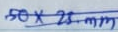

Feature Vector: [1.0395658016204834, 1.843759298324585, 0.04294678196310997, 0.4629899263381958, 0.6841756105422974, 0.9491699934005737, 0.31074243783950806, 0.33536437153816223, 0.4186446964740753, 0.4171920418739319, 0.06187833473086357, 0.09462574869394302, 0.0329999178647995, 0.0722922533750534, 0.6684909462928772, 0.13596802949905396, 0.42163094878196716, 0.014239960350096226, 0.4847261607646942, 0.15023678541183472, 0.13306033611297607, 0.38576841354370117, 0.19132263958454132, 1.5097497701644897, 0.5944778919219971, 0.05980747565627098, 0.11746813356876373, 0.8712069392204285, 0.2652004361152649, 0.018088947981595993, 0.45375823974609375, 1.1049062013626099, 0.0872320830821991, 0.15986855328083038, 0.3222177028656006, 0.06881427764892578, 1.2932841777801514, 0.06329816579818726, 0.16917039453983307, 0.280299574136734, 0.8037323951721191, 0.31755736470222473, 0.3371923863887787, 0.0, 0.057712603360414505, 0.14933635294437408, 0.050936009734869, 1.02866530418396, 0.042311191558837

Feature Vector: [0.5855586528778076, 1.9879564046859741, 0.28786033391952515, 0.20503661036491394, 0.13723677396774292, 0.0628177747130394, 0.17534205317497253, 0.013133108615875244, 0.7924164533615112, 1.0808773040771484, 0.007080516777932644, 0.05022377520799637, 0.132471963763237, 0.07992233335971832, 0.33101823925971985, 0.024124130606651306, 0.36661505699157715, 0.02903536707162857, 0.04913061857223511, 0.061118192970752716, 0.0332137793302536, 0.4072931110858917, 0.1260538101196289, 1.0628656148910522, 0.5226312875747681, 0.5007794499397278, 0.1454143524169922, 0.22239241003990173, 0.8206334114074707, 0.0882209986448288, 0.2343173325061798, 1.0433462858200073, 0.08213255554437637, 0.06264194846153259, 0.4441675841808319, 0.07919716089963913, 0.2782042622566223, 0.17941224575042725, 0.07015200704336166, 0.669190526008606, 0.4231455624103546, 0.1729547530412674, 0.6375870704650879, 0.01630161516368389, 0.06015728786587715, 0.5851340889930725, 0.4625760614871979, 0.5640285015106201,

Feature Vector: [0.11610834300518036, 2.8399035930633545, 0.0658169686794281, 0.020481586456298828, 0.021906444802880287, 0.12432030588388443, 0.19495567679405212, 0.0096362279728055, 1.0954630374908447, 0.15645915269851685, 0.028166845440864563, 0.23276112973690033, 0.24176685512065887, 0.044324491173028946, 0.21577188372612, 0.01996062882244587, 0.3371638059616089, 0.10122999548912048, 0.03176717460155487, 0.038962822407484055, 0.010529601946473122, 0.021068809553980827, 0.06063691899180412, 0.8289493918418884, 0.23381218314170837, 0.12873715162277222, 0.00649690069258213, 0.059880129992961884, 0.14757663011550903, 0.28164952993392944, 0.04396834969520569, 0.8744496703147888, 0.010175555944442749, 0.1245817244052887, 0.08979412913322449, 0.018440337851643562, 0.005356882233172655, 0.07461363822221756, 0.10279559344053268, 0.5110299587249756, 0.34408673644065857, 0.1469489485025406, 0.28061965107917786, 0.12139498442411423, 0.025738190859556198, 0.20573510229587555, 0.2435006350278854

Feature Vector: [1.342445731163025, 2.066936492919922, 0.061297427862882614, 0.00036170685780234635, 0.34746459126472473, 0.8415332436561584, 0.3484005331993103, 0.0029661115258932114, 1.695752501487732, 0.13251382112503052, 0.00017253421538043767, 0.6074209809303284, 0.33012184500694275, 0.15040168166160583, 0.5281152725219727, 0.010084254667162895, 0.1110917329788208, 0.034675050526857376, 0.3446153998374939, 0.001352490857243538, 0.14814487099647522, 0.07877174019813538, 0.1145440936088562, 1.4913041591644287, 0.2894516587257385, 0.22826920449733734, 0.056076258420944214, 0.2072681337594986, 0.019955681636929512, 0.20264339447021484, 0.789264976978302, 1.3824573755264282, 0.09317716956138611, 0.07249739021062851, 0.5746538043022156, 0.09525182098150253, 0.09297754615545273, 0.15152576565742493, 0.03286565840244293, 0.2327423244714737, 1.2087934017181396, 0.14104308187961578, 0.29404833912849426, 0.006374334916472435, 0.07238496094942093, 0.4186284840106964, 0.4085734486579895, 1.849

Feature Vector: [0.144338458776474, 2.6891448497772217, 0.044438377022743225, 0.052769649773836136, 0.20338138937950134, 0.20831234753131866, 0.3241764307022095, 0.04186323657631874, 0.7067631483078003, 0.32302287220954895, 0.008791099302470684, 0.10938117653131485, 0.1769726276397705, 0.020197631791234016, 0.1967405080795288, 0.06739529967308044, 0.27655571699142456, 0.021240849047899246, 0.5778894424438477, 0.03856376186013222, 0.1117175742983818, 0.39286965131759644, 0.24087809026241302, 1.2517714500427246, 0.03987846150994301, 0.1446557492017746, 0.12472786009311676, 0.0792517140507698, 0.045693397521972656, 0.06768947094678879, 0.19768548011779785, 0.5543050765991211, 0.05305587872862816, 0.08396964520215988, 0.21329796314239502, 0.0869554877281189, 0.31726908683776855, 0.08333197236061096, 0.1649557650089264, 0.37360474467277527, 1.0982351303100586, 0.06184104084968567, 0.25808027386665344, 0.01651518978178501, 0.06702477484941483, 0.30490994453430176, 0.15837185084819794, 0.3538

Feature Vector: [0.7224948406219482, 3.314232587814331, 0.2827182412147522, 0.0, 0.23128750920295715, 0.5165722370147705, 0.26091840863227844, 0.08143852651119232, 1.082485556602478, 0.42340853810310364, 0.02815261483192444, 0.20997968316078186, 0.27479082345962524, 0.12636201083660126, 0.09560306370258331, 0.017450325191020966, 0.2659378945827484, 0.08805796504020691, 0.0970102995634079, 0.029793793335556984, 0.0015150965191423893, 0.06931445002555847, 0.14531397819519043, 1.27781081199646, 0.431830495595932, 0.3834136128425598, 0.013465814292430878, 0.07171270996332169, 0.027061516419053078, 0.31621283292770386, 0.249930277466774, 0.7929977178573608, 0.01729007251560688, 0.13885580003261566, 0.25665393471717834, 0.017699498683214188, 0.030692409723997116, 0.25316470861434937, 0.04184287041425705, 0.36496812105178833, 0.8030339479446411, 0.3233136832714081, 0.2758733630180359, 0.00824150163680315, 0.08908752351999283, 0.3521471917629242, 0.22149452567100525, 0.792963445186615, 0.01589

Feature Vector: [0.5705437064170837, 1.8925881385803223, 0.2118023782968521, 0.02424771524965763, 0.06362739205360413, 0.1226261705160141, 0.12882526218891144, 0.03899303823709488, 1.0369277000427246, 0.21754956245422363, 0.04654451832175255, 0.14350832998752594, 0.11235220730304718, 0.09555000811815262, 0.2242491990327835, 0.0, 0.2653825879096985, 0.09798990190029144, 0.035184524953365326, 0.023974550887942314, 0.037017274647951126, 0.07246366143226624, 0.049760639667510986, 0.7924320697784424, 0.8629782795906067, 0.1845882385969162, 0.20809756219387054, 0.12587043642997742, 0.13892000913619995, 0.4102034568786621, 0.1122279092669487, 1.0683140754699707, 0.0036409469321370125, 0.0562966950237751, 0.16806474328041077, 0.005874032154679298, 0.04262148588895798, 0.004676626529544592, 0.08637689054012299, 0.11525620520114899, 0.5225242376327515, 0.0596851222217083, 0.23808741569519043, 0.11735020577907562, 0.006435062736272812, 0.642764151096344, 0.45555320382118225, 0.7190756797790527, 0

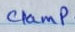

Feature Vector: [0.20022088289260864, 2.521824836730957, 0.04758160933852196, 0.025425046682357788, 0.5838961601257324, 0.5396596193313599, 0.222194105386734, 0.09614881128072739, 0.7402695417404175, 0.1784285455942154, 0.021299419924616814, 0.07337512075901031, 0.08011093735694885, 0.020063869655132294, 0.09746821224689484, 0.08206780254840851, 0.176583930850029, 0.017447112128138542, 0.1701456904411316, 0.1020713523030281, 0.11541750282049179, 0.17192846536636353, 0.02795361541211605, 1.21161687374115, 0.24987170100212097, 0.033708103001117706, 0.02109021507203579, 0.3205930292606354, 0.06535761058330536, 0.12282851338386536, 0.19729755818843842, 0.8550305366516113, 0.02055303193628788, 0.11140811443328857, 0.12412621080875397, 0.020760932937264442, 0.5176209807395935, 0.057627804577350616, 0.12496083229780197, 0.3122706413269043, 0.7388348579406738, 0.1052408218383789, 0.22584940493106842, 0.0032792321871966124, 0.02822764776647091, 0.14095817506313324, 0.18559491634368896, 0.499603

Feature Vector: [0.33221152424812317, 3.6539101600646973, 0.06689522415399551, 0.0020606047473847866, 0.12290254980325699, 0.25687408447265625, 0.2522840201854706, 0.02861219272017479, 0.3670642673969269, 0.07023843377828598, 0.017378833144903183, 0.2366165965795517, 0.14859449863433838, 0.014276031404733658, 0.24582761526107788, 0.019947519525885582, 0.3081139326095581, 0.07117323577404022, 0.21536380052566528, 0.0355510450899601, 0.0038409836124628782, 0.008390773087739944, 0.007681087590754032, 0.6077013611793518, 0.41238415241241455, 0.09025555104017258, 0.09149731695652008, 0.1114693433046341, 0.07241953909397125, 0.1183050274848938, 0.08800483494997025, 1.5480202436447144, 0.09404247999191284, 0.13718000054359436, 0.013851284980773926, 0.025012141093611717, 0.09340053051710129, 0.11272169649600983, 0.027259834110736847, 0.40353918075561523, 0.4639400839805603, 0.06018204614520073, 0.21048037707805634, 0.0019049464026466012, 0.08333992213010788, 0.10094182193279266, 0.216498419642

Feature Vector: [0.8038521409034729, 1.7536667585372925, 0.15292805433273315, 0.006384116131812334, 0.09275028854608536, 0.14266155660152435, 0.4709007740020752, 0.011296555399894714, 1.7882440090179443, 0.3691703975200653, 0.024098839610815048, 0.15859737992286682, 0.1469326764345169, 0.07942696660757065, 0.27719175815582275, 0.009956855326890945, 0.18245024979114532, 0.14161035418510437, 0.02824191004037857, 0.05110658332705498, 0.10195990651845932, 0.4628830850124359, 0.059589844197034836, 0.9432475566864014, 0.4248870015144348, 0.2733759880065918, 0.10571497678756714, 0.43287721276283264, 0.022849831730127335, 0.2391306608915329, 0.14405834674835205, 0.9595025777816772, 0.1708761751651764, 0.1332867592573166, 0.5553044080734253, 0.005310656502842903, 0.025185057893395424, 0.08593178540468216, 0.17234978079795837, 0.21021462976932526, 0.9400032162666321, 0.09605354815721512, 0.3626765012741089, 0.4266635477542877, 0.06496824324131012, 0.35791927576065063, 0.2569164037704468, 1.13160

Feature Vector: [0.7956744432449341, 1.9316900968551636, 0.15915833413600922, 0.0355047732591629, 0.16680637001991272, 0.27392035722732544, 0.2599616050720215, 0.0, 0.8331103920936584, 0.35401347279548645, 0.09393870830535889, 0.5535641312599182, 0.17530560493469238, 0.0052893939428031445, 0.5841615796089172, 0.0028141906950622797, 0.5286738872528076, 0.00864279642701149, 0.12882527709007263, 0.05175093561410904, 0.11253315210342407, 0.14160987734794617, 0.3326761722564697, 2.044250726699829, 0.1836383193731308, 0.3968677222728729, 0.07212730497121811, 0.3548278510570526, 0.052732616662979126, 0.16173075139522552, 0.8011594414710999, 1.638179063796997, 0.3371642827987671, 0.12672604620456696, 0.3616466820240021, 0.06416398286819458, 0.11380820721387863, 0.38874438405036926, 0.022074462845921516, 0.5638862252235413, 1.2251211404800415, 0.11607996374368668, 0.2871147692203522, 0.027605896815657616, 0.03293363004922867, 0.3952067494392395, 0.4281589388847351, 1.4514923095703125, 0.1376121

Feature Vector: [0.2569652199745178, 2.3678102493286133, 0.0756029486656189, 0.027950063347816467, 0.48175662755966187, 0.46656736731529236, 0.2534128427505493, 0.0330759659409523, 0.34820494055747986, 0.06107659265398979, 0.013257148675620556, 0.11553940176963806, 0.0544988289475441, 0.028963496908545494, 0.2829579710960388, 0.04132875055074692, 0.11218532919883728, 0.03584090247750282, 0.12376606464385986, 0.09303508698940277, 0.0678434669971466, 0.12805113196372986, 0.05907784774899483, 0.7653177976608276, 0.29047510027885437, 0.22400186955928802, 0.009828289970755577, 0.2716270387172699, 0.0475468672811985, 0.10500997304916382, 0.06982061266899109, 1.1235345602035522, 0.06037222594022751, 0.055511366575956345, 0.14916883409023285, 0.1279585063457489, 0.38310518860816956, 0.14509309828281403, 0.12003584206104279, 0.32925423979759216, 0.6163660287857056, 0.26509711146354675, 0.28612661361694336, 0.018202878534793854, 0.0899234488606453, 0.21595580875873566, 0.11972859501838684, 0.490

Feature Vector: [0.6289025545120239, 2.589503765106201, 0.14325137436389923, 0.1774946004152298, 0.2501775324344635, 0.5354413986206055, 0.38620877265930176, 0.0, 0.279010534286499, 0.0703769251704216, 0.03175609931349754, 0.15034067630767822, 0.07843278348445892, 0.005896740593016148, 0.6493715047836304, 0.013316882774233818, 0.3925553858280182, 0.01811482571065426, 0.33264490962028503, 0.057982318103313446, 0.038100436329841614, 0.11620752513408661, 0.02421731874346733, 1.41329026222229, 0.36255085468292236, 0.16471800208091736, 0.1331111490726471, 0.43560120463371277, 0.03498665988445282, 0.021394027397036552, 0.44831737875938416, 1.3475346565246582, 0.03395447880029678, 0.21115975081920624, 0.01099172793328762, 0.034699466079473495, 0.4563884735107422, 0.2576645314693451, 0.04248213395476341, 0.35765257477760315, 0.806557297706604, 0.19095909595489502, 0.19167926907539368, 0.000838008476421237, 0.08888562768697739, 0.09986562281847, 0.15380269289016724, 0.7786644101142883, 0.057590

Feature Vector: [0.3622424900531769, 2.105142593383789, 0.22538769245147705, 0.052094392478466034, 0.23184961080551147, 0.2912197411060333, 0.4759695827960968, 0.02279217354953289, 0.6932883858680725, 0.18893751502037048, 0.027072789147496223, 0.16588686406612396, 0.04724200814962387, 0.0, 0.17230044305324554, 0.10982850193977356, 0.15868905186653137, 0.005672359373420477, 0.15324217081069946, 0.012583812698721886, 0.03353368118405342, 0.07761901617050171, 0.118118517100811, 0.9962826371192932, 0.14266614615917206, 0.33882635831832886, 0.027711469680070877, 0.1757228970527649, 0.04173880070447922, 0.06138566508889198, 0.2522505819797516, 0.7671315670013428, 0.019685151055455208, 0.06442422419786453, 0.17460867762565613, 0.025946801528334618, 0.40262746810913086, 0.3021147847175598, 0.1750253587961197, 0.14177390933036804, 1.017769455909729, 0.23300328850746155, 0.15602771937847137, 0.008773145265877247, 0.147019624710083, 0.29838958382606506, 0.15071183443069458, 0.5473183393478394, 0.

Feature Vector: [0.04213724285364151, 3.363325834274292, 0.044818051159381866, 0.0, 0.08642314374446869, 0.21301575005054474, 0.16099368035793304, 0.001158799510449171, 0.3685382008552551, 0.0512918122112751, 0.04479053243994713, 0.08361400663852692, 0.3538922667503357, 0.015329034999012947, 0.033324990421533585, 0.02361711673438549, 0.330786794424057, 0.04753436893224716, 0.04496772959828377, 0.04096696898341179, 0.020502084866166115, 0.014505377039313316, 0.007405542768537998, 0.6029783487319946, 0.26001840829849243, 0.02915380150079727, 0.019153349101543427, 0.07400600612163544, 0.030047457665205002, 0.0491936057806015, 0.11980476975440979, 0.8754473328590393, 0.02270643040537834, 0.10052280873060226, 0.00880454108119011, 0.024114495143294334, 0.08624249696731567, 0.03563041239976883, 0.03411146253347397, 0.574796736240387, 0.394906222820282, 0.0834912583231926, 0.19568432867527008, 0.022542744874954224, 0.053550612181425095, 0.06112062558531761, 0.25324225425720215, 0.4275490045547

Feature Vector: [0.4420350193977356, 3.597306966781616, 0.06447624415159225, 0.0021631126292049885, 0.07916726171970367, 0.29633715748786926, 0.10135394334793091, 0.012851235456764698, 0.6263282299041748, 0.044421710073947906, 0.0422327034175396, 0.28666752576828003, 0.2321368306875229, 0.026896681636571884, 0.07249128818511963, 0.01861826330423355, 0.25273603200912476, 0.030591487884521484, 0.11355633288621902, 0.02937382087111473, 0.03182380273938179, 0.0976913720369339, 0.1021709069609642, 0.902990996837616, 0.46312180161476135, 0.27676787972450256, 0.07935331016778946, 0.17008419334888458, 0.026275761425495148, 0.09352628886699677, 0.1634231060743332, 1.3699227571487427, 0.08886922895908356, 0.18956336379051208, 0.06401073932647705, 0.07982069998979568, 0.1941935271024704, 0.4307848811149597, 0.015187493525445461, 0.39652904868125916, 0.8651921153068542, 0.1440747231245041, 0.22384198009967804, 0.011285330168902874, 0.09115686267614365, 0.25433892011642456, 0.14788565039634705, 0.7

Feature Vector: [0.16611656546592712, 3.251551628112793, 0.06561046838760376, 0.0, 0.13923639059066772, 0.5714752078056335, 0.1537059247493744, 0.011593805626034737, 0.4886663854122162, 0.11257070302963257, 0.04299047216773033, 0.13977478444576263, 0.1727517992258072, 0.024799371138215065, 0.10329864174127579, 0.031680136919021606, 0.38432934880256653, 0.01789027824997902, 0.17730775475502014, 0.06113565340638161, 0.012391069903969765, 0.2556765079498291, 0.06132230535149574, 1.5620383024215698, 0.13541856408119202, 0.4064662754535675, 0.040838874876499176, 0.06462068855762482, 0.07674495875835419, 0.11384319514036179, 0.18269626796245575, 0.7138036489486694, 0.11617466062307358, 0.09328614175319672, 0.12261813879013062, 0.11034923791885376, 0.10882772505283356, 0.17531028389930725, 0.24570724368095398, 0.6907243728637695, 0.8674584031105042, 0.09715951234102249, 0.2379155457019806, 0.004573355428874493, 0.0479716882109642, 0.24532800912857056, 0.29657357931137085, 0.3528173267841339, 

Feature Vector: [0.8977111577987671, 0.7990227341651917, 0.4166855812072754, 0.10541433840990067, 0.5435131192207336, 0.20970550179481506, 0.4303755462169647, 0.015028118155896664, 1.6767126321792603, 0.40539097785949707, 0.04449992626905441, 0.12290627509355545, 0.14853891730308533, 0.005482375156134367, 0.16138532757759094, 0.011296303942799568, 0.03650978207588196, 0.020149173215031624, 0.24283398687839508, 0.06686564534902573, 0.19983741641044617, 0.20443184673786163, 0.485376238822937, 0.9884409308433533, 0.48819848895072937, 0.16531920433044434, 0.4366897940635681, 0.5904085040092468, 0.0005883328267373145, 0.33648961782455444, 0.27406129240989685, 1.1837044954299927, 0.33870378136634827, 0.051880769431591034, 0.6854450702667236, 0.002448827726766467, 0.38776713609695435, 0.24439075589179993, 0.3282727599143982, 0.18633989989757538, 0.33218637108802795, 0.01394785288721323, 0.7687276005744934, 0.1458086222410202, 0.03189929574728012, 0.4653102457523346, 0.4243633449077606, 1.3144

Feature Vector: [0.06389316916465759, 3.027036428451538, 0.061820775270462036, 0.026911785826086998, 0.20254108309745789, 0.315253883600235, 0.06562790274620056, 0.06507416814565659, 0.5820143818855286, 0.12606647610664368, 0.03971105068922043, 0.0968896746635437, 0.28317663073539734, 0.02992338500916958, 0.11928120255470276, 0.005144942086189985, 0.3225139379501343, 0.05704884976148605, 0.07142110913991928, 0.04778806120157242, 0.02075587958097458, 0.017804132774472237, 0.05348851904273033, 0.6067841649055481, 0.5535369515419006, 0.04161291569471359, 0.004072878509759903, 0.1733943521976471, 0.17116045951843262, 0.3573569357395172, 0.053870949894189835, 0.7869945168495178, 0.007494970690459013, 0.10643935948610306, 0.1218002662062645, 0.05464297533035278, 0.10906735062599182, 0.054657310247421265, 0.09732242673635483, 0.5705658197402954, 0.4821677803993225, 0.08350617438554764, 0.18380694091320038, 0.05433306097984314, 0.06060269474983215, 0.17242775857448578, 0.4070368707180023, 0.43

Feature Vector: [0.1914505809545517, 3.1696245670318604, 0.08840151131153107, 0.0017192782834172249, 0.20360954105854034, 0.2518090307712555, 0.1532915234565735, 0.0580962635576725, 0.3006148338317871, 0.05040580406785011, 0.047229912132024765, 0.13161902129650116, 0.04350680112838745, 0.004183894023299217, 0.14099161326885223, 0.06565073132514954, 0.269220769405365, 0.01756296306848526, 0.29680976271629333, 0.0385420024394989, 0.036961570382118225, 0.033332955092191696, 0.04703129455447197, 0.911501407623291, 0.3734336793422699, 0.14893585443496704, 0.11623860150575638, 0.18758301436901093, 0.025528833270072937, 0.035833753645420074, 0.07975653558969498, 1.1115731000900269, 0.05528378114104271, 0.2614569067955017, 0.043252132833004, 0.025404760614037514, 0.2627709209918976, 0.14286060631275177, 0.06315214931964874, 0.33322080969810486, 0.7388389110565186, 0.10052809119224548, 0.12727820873260498, 0.0176850613206625, 0.06883146613836288, 0.14554107189178467, 0.05763097107410431, 0.6307

Feature Vector: [0.4021393060684204, 0.7287430167198181, 0.24043339490890503, 0.13537053763866425, 0.1293346881866455, 0.32711970806121826, 0.3332219123840332, 0.067014180123806, 0.7435531616210938, 0.2445334643125534, 0.09164358675479889, 0.25491800904273987, 0.13088838756084442, 0.006087223067879677, 0.273792028427124, 0.016391992568969727, 0.1549380123615265, 0.06738752126693726, 0.23999851942062378, 0.0467115193605423, 0.07940615713596344, 0.23710356652736664, 0.2919216454029083, 1.2361466884613037, 0.47588497400283813, 0.30378013849258423, 0.1610921025276184, 0.3622516691684723, 0.04104933142662048, 0.14017842710018158, 0.44526609778404236, 1.1038804054260254, 0.13537433743476868, 0.08035730570554733, 0.36100760102272034, 0.02185673639178276, 0.4286152720451355, 0.1783137023448944, 0.2101515531539917, 0.1707141399383545, 0.5246658325195312, 0.0, 0.29424118995666504, 0.04006478935480118, 0.0035771194379776716, 0.6470521688461304, 0.3704732060432434, 1.3115224838256836, 0.0328367501

Feature Vector: [0.3384404182434082, 3.360672950744629, 0.11639003455638885, 0.0, 0.28603804111480713, 0.4200350344181061, 0.11235632002353668, 0.0033927331678569317, 0.489487886428833, 0.15438582003116608, 0.021192628890275955, 0.16463488340377808, 0.16491031646728516, 0.009359930641949177, 0.15622679889202118, 0.045508451759815216, 0.29733535647392273, 0.04056524857878685, 0.020543791353702545, 0.027786817401647568, 0.05027616396546364, 0.04022182896733284, 0.00872186291962862, 1.1691069602966309, 0.3975259065628052, 0.23972976207733154, 0.010650853626430035, 0.11710195988416672, 0.07004745304584503, 0.1389201283454895, 0.17080287635326385, 0.9961005449295044, 0.0643462985754013, 0.08137042820453644, 0.07243715971708298, 0.02702261693775654, 0.15860815346240997, 0.24210688471794128, 0.12174011021852493, 0.4983372092247009, 0.4103682041168213, 0.09109890460968018, 0.1616077572107315, 0.005922038108110428, 0.050953466445207596, 0.2139730304479599, 0.22562308609485626, 0.560301601886749

Feature Vector: [0.15868711471557617, 2.765469551086426, 0.08672155439853668, 0.0, 0.6784265637397766, 0.38145408034324646, 0.1620287001132965, 0.017692314460873604, 0.3382231593132019, 0.05422401428222656, 0.09897531569004059, 0.11421433091163635, 0.1386084258556366, 0.005156957544386387, 0.22484955191612244, 0.021193034946918488, 0.28427329659461975, 0.02745317481458187, 0.10601934045553207, 0.059627801179885864, 0.11086728423833847, 0.012680435553193092, 0.0, 1.274179458618164, 0.2714269161224365, 0.4708389639854431, 0.026752430945634842, 0.08220866322517395, 0.02307160012423992, 0.03340218588709831, 0.19169723987579346, 1.0046707391738892, 0.007819030433893204, 0.05904354527592659, 0.1582810878753662, 0.1451231837272644, 0.2656480371952057, 0.057311106473207474, 0.06556875258684158, 0.1646229475736618, 0.7557312846183777, 0.19629578292369843, 0.11821284890174866, 0.0027239511255174875, 0.08906949311494827, 0.12032803893089294, 0.37551286816596985, 0.7285049557685852, 0.033941470086

Feature Vector: [0.3608725368976593, 2.539095401763916, 0.20699988305568695, 0.015045073814690113, 0.5270690321922302, 0.2923488914966583, 0.2737518548965454, 0.07083505392074585, 0.7872177362442017, 0.264739453792572, 0.04536664858460426, 0.3290139138698578, 0.13420626521110535, 0.2700628638267517, 0.359579861164093, 0.013167619705200195, 0.27474501729011536, 0.054691676050424576, 0.19466419517993927, 0.047147564589977264, 0.0875302255153656, 0.07834982872009277, 0.045876406133174896, 0.8700754046440125, 0.3660033047199249, 0.20794542133808136, 0.036453183740377426, 0.17093048989772797, 0.03721250593662262, 0.1511695235967636, 0.12664584815502167, 0.850770890712738, 0.13523653149604797, 0.1453249156475067, 0.21020017564296722, 0.07874395698308945, 0.08258324861526489, 0.10842593759298325, 0.10930868983268738, 0.31250277161598206, 0.573624849319458, 0.08023636043071747, 0.44520553946495056, 0.014065880328416824, 0.03329120948910713, 0.2602309286594391, 0.14379684627056122, 1.0495798587

Feature Vector: [0.5910138487815857, 2.164766788482666, 0.1760597825050354, 0.20155209302902222, 0.5345551371574402, 0.686313807964325, 0.4184029996395111, 0.12294324487447739, 1.0650447607040405, 0.4575425684452057, 0.036188047379255295, 0.3375532329082489, 0.06182095780968666, 0.10149940103292465, 0.16994623839855194, 0.1239229291677475, 0.1959625780582428, 0.006823008880019188, 0.23195874691009521, 0.03446998819708824, 0.018517181277275085, 0.14004236459732056, 0.053678035736083984, 1.6256555318832397, 0.23046034574508667, 0.20075544714927673, 0.24109210073947906, 0.17616213858127594, 0.14923949539661407, 0.03356669098138809, 0.14160926640033722, 0.9044899940490723, 0.05360221490263939, 0.08426649868488312, 0.24235199391841888, 0.08896609395742416, 0.5290306806564331, 0.09101889282464981, 0.20554976165294647, 0.2181471288204193, 0.8211876153945923, 0.12759627401828766, 0.23886561393737793, 0.02971288189291954, 0.0029976866208016872, 0.3249668478965759, 0.09218839555978775, 0.7407675

Feature Vector: [0.6328420639038086, 2.5788025856018066, 0.05825963243842125, 0.008382955566048622, 0.3874075710773468, 0.4965640604496002, 0.13725796341896057, 0.0930011197924614, 0.5678505301475525, 0.20632866024971008, 0.03577052056789398, 0.20575714111328125, 0.06597581505775452, 0.05975009873509407, 0.08190443366765976, 0.014551187865436077, 0.17695178091526031, 0.01421554945409298, 0.2903446853160858, 0.12305241823196411, 0.01995466835796833, 0.18092797696590424, 0.0, 1.288796067237854, 0.22466130554676056, 0.11429614573717117, 0.0013367801439017057, 0.05670292675495148, 0.05377368628978729, 0.0765136182308197, 0.18563009798526764, 0.8436617255210876, 0.0515345074236393, 0.03892984241247177, 0.09043880552053452, 0.11678950488567352, 0.23391829431056976, 0.1666700839996338, 0.17250284552574158, 0.05963239446282387, 0.9189478754997253, 0.12750789523124695, 0.12234267592430115, 0.005644449032843113, 0.06690458953380585, 0.38149958848953247, 0.24667561054229736, 0.7376132607460022, 0

Feature Vector: [0.14641878008842468, 2.838719606399536, 0.1344965696334839, 0.0, 0.3341582119464874, 0.26937395334243774, 0.28258925676345825, 0.012476901523768902, 0.6852333545684814, 0.10162270814180374, 0.04971704259514809, 0.06715107709169388, 0.060284022241830826, 0.032626260071992874, 0.28669658303260803, 0.0131535017862916, 0.35990867018699646, 0.02679259143769741, 0.049924228340387344, 0.07592827826738358, 0.02560281753540039, 0.06708865612745285, 0.016285434365272522, 1.089571475982666, 0.31245753169059753, 0.48233720660209656, 0.011673898436129093, 0.028463808819651604, 0.058190856128931046, 0.106292724609375, 0.2354431301355362, 0.8631446957588196, 0.0626612976193428, 0.09359921514987946, 0.11491140723228455, 0.012736142612993717, 0.08208940178155899, 0.0605727955698967, 0.09956289827823639, 0.402747243642807, 0.8202371597290039, 0.1863870620727539, 0.11469443887472153, 0.017415592446923256, 0.030863717198371887, 0.17867740988731384, 0.0848599448800087, 0.6007573008537292, 

Feature Vector: [0.5144396424293518, 2.7338602542877197, 0.28081342577934265, 0.05659235268831253, 0.07117193937301636, 0.14605708420276642, 0.6067632436752319, 0.0, 0.8064470887184143, 0.4362907111644745, 0.03487106412649155, 0.09524243324995041, 0.1081625297665596, 0.010120980441570282, 0.46288061141967773, 0.02107144333422184, 0.4229307770729065, 0.039029937237501144, 0.1612648367881775, 0.0476265549659729, 0.02906770631670952, 0.08986081182956696, 0.11485163867473602, 1.4454759359359741, 0.45984742045402527, 0.40159568190574646, 0.07761992514133453, 0.05706486105918884, 0.033914435654878616, 0.1265587955713272, 0.40567752718925476, 1.050673007965088, 0.16197045147418976, 0.20319582521915436, 0.16718097031116486, 0.006173890549689531, 0.10062253475189209, 0.2610955238342285, 0.030758429318666458, 0.2724158763885498, 0.6801673173904419, 0.15490812063217163, 0.3782762885093689, 0.014192045666277409, 0.047855228185653687, 0.633121907711029, 0.28409382700920105, 1.133004903793335, 0.094

Feature Vector: [0.18525449931621552, 2.0941901206970215, 0.10622043907642365, 0.0008591483347117901, 0.36228305101394653, 0.6638708114624023, 0.17878292500972748, 0.0148204630240798, 0.4135989844799042, 0.0952993631362915, 0.04002159461379051, 0.2935549318790436, 0.049799248576164246, 0.01818404719233513, 0.3679155111312866, 0.1589173972606659, 0.17579138278961182, 0.026842880994081497, 0.252657949924469, 0.08865252137184143, 0.03467193990945816, 0.17198996245861053, 0.0, 1.5636928081512451, 0.19563117623329163, 0.3481980264186859, 0.006049509160220623, 0.07536424696445465, 0.025022123008966446, 0.01986539363861084, 0.2281087040901184, 0.915751576423645, 0.10758143663406372, 0.4001034200191498, 0.07990415394306183, 0.040536582469940186, 0.32778650522232056, 0.036710865795612335, 0.19510771334171295, 0.07556948065757751, 0.6591550707817078, 0.12007802724838257, 0.19477297365665436, 0.03912324458360672, 0.08502817153930664, 0.2890926003456116, 0.11430203914642334, 0.7213365435600281, 0.

Feature Vector: [0.3944380581378937, 2.4431111812591553, 0.0758318156003952, 0.060007862746715546, 0.1250254362821579, 0.2624622583389282, 0.16769428551197052, 0.0026542593259364367, 0.6176671385765076, 0.2795320451259613, 0.020246822386980057, 0.08944057673215866, 0.1290007084608078, 0.018494460731744766, 0.01947748102247715, 0.06475633382797241, 0.32775241136550903, 0.08194677531719208, 0.22893087565898895, 0.05170321837067604, 0.08366113156080246, 0.1436249315738678, 0.1629037708044052, 1.3639322519302368, 0.4273955821990967, 0.17232424020767212, 0.1238831877708435, 0.4212195873260498, 0.04250150918960571, 0.07151694595813751, 0.44038859009742737, 1.061343789100647, 0.08456882834434509, 0.2376633733510971, 0.0026543845888227224, 0.019655128940939903, 0.4507119357585907, 0.2591547667980194, 0.0353299118578434, 0.10797838121652603, 0.8443570733070374, 0.1852147877216339, 0.18691624701023102, 0.02418483793735504, 0.07387927174568176, 0.36724501848220825, 0.32237690687179565, 0.82670038

Feature Vector: [0.16577547788619995, 3.13094162940979, 0.1624327450990677, 0.0, 0.31709790229797363, 0.21662214398384094, 0.15886852145195007, 0.017014063894748688, 0.7875875234603882, 0.18934237957000732, 0.03456081077456474, 0.11487417668104172, 0.1057262048125267, 0.03090965747833252, 0.05346537008881569, 0.06348710507154465, 0.14265811443328857, 0.041624464094638824, 0.1621193289756775, 0.04335832595825195, 0.02282753773033619, 0.1337040811777115, 0.02847888506948948, 1.0792840719223022, 0.12015645205974579, 0.35604920983314514, 0.007250240072607994, 0.041475217789411545, 0.15335305035114288, 0.07726962119340897, 0.1835993230342865, 0.4093208611011505, 0.030494743958115578, 0.16712108254432678, 0.13457660377025604, 0.10619258880615234, 0.0708562582731247, 0.19780795276165009, 0.019768280908465385, 0.6472120881080627, 0.8274878859519958, 0.215399369597435, 0.0997324287891388, 0.04418020322918892, 0.09984534978866577, 0.24751976132392883, 0.1324828565120697, 0.4295058250427246, 0.01

Feature Vector: [0.188766747713089, 1.3621705770492554, 0.36873382329940796, 0.007711578160524368, 0.11809796094894409, 0.29511967301368713, 0.261694997549057, 0.031227681785821915, 1.1572257280349731, 0.111347496509552, 0.023197049275040627, 0.13002176582813263, 0.06820927560329437, 0.026612281799316406, 0.14131487905979156, 0.007970266044139862, 0.14931754767894745, 0.038840096443891525, 0.06290265172719955, 0.03458778187632561, 0.09632012248039246, 0.027490144595503807, 0.4449763894081116, 1.0661301612854004, 0.34944653511047363, 0.3531179130077362, 0.31575560569763184, 0.28631094098091125, 0.07239740341901779, 0.4688396751880646, 0.09516172111034393, 1.2934867143630981, 0.2120313048362732, 0.16989818215370178, 0.4545673727989197, 0.07564516365528107, 0.15449951589107513, 0.13584177196025848, 0.09894945472478867, 0.9273656606674194, 0.46382755041122437, 0.020153038203716278, 0.6149705648422241, 0.05725264176726341, 0.056495551019907, 0.43777793645858765, 0.29862433671951294, 0.90526

Feature Vector: [1.0404316186904907, 2.2046353816986084, 0.0343291237950325, 0.0, 0.33336031436920166, 0.42034122347831726, 0.24302470684051514, 0.02730836719274521, 1.2849825620651245, 0.29959508776664734, 0.0009934281697496772, 0.2850239872932434, 0.11992045491933823, 0.09361010789871216, 0.25055378675460815, 0.016894930973649025, 0.09109452366828918, 0.02973066084086895, 0.18933691084384918, 0.026925118640065193, 0.11778528988361359, 0.05591120198369026, 0.39143475890159607, 1.9054838418960571, 0.5860570669174194, 0.32447782158851624, 0.01897653564810753, 0.1071498841047287, 0.009266000241041183, 0.19787655770778656, 0.5583115220069885, 1.0245575904846191, 0.026311207562685013, 0.2946004569530487, 0.5549245476722717, 0.05855773761868477, 0.33436906337738037, 0.318300724029541, 0.08119617402553558, 0.3051593601703644, 0.9116487503051758, 0.08931245654821396, 0.5811920166015625, 0.0, 0.08033207803964615, 0.34291139245033264, 0.2960832118988037, 1.0665422677993774, 0.09574520587921143,

Feature Vector: [0.18254852294921875, 4.418827056884766, 0.06857247650623322, 0.013733219355344772, 0.3322800099849701, 0.34723347425460815, 0.18589089810848236, 0.018640609458088875, 0.4426829218864441, 0.06732720136642456, 0.040257424116134644, 0.12582087516784668, 0.16187304258346558, 0.0264381505548954, 0.08271656930446625, 0.04177071154117584, 0.24839507043361664, 0.024379290640354156, 0.025994721800088882, 0.0361257828772068, 0.004087826237082481, 0.023496979847550392, 0.013879521749913692, 0.7152389883995056, 0.5740544199943542, 0.07607828080654144, 0.05994692072272301, 0.20251630246639252, 0.023447679355740547, 0.06644219905138016, 0.10577846318483353, 0.8391115069389343, 0.028453275561332703, 0.07678846269845963, 0.09227291494607925, 0.027449630200862885, 0.2646658420562744, 0.17939910292625427, 0.0754864513874054, 0.37406882643699646, 0.6633628010749817, 0.18037782609462738, 0.04951374977827072, 0.00809901487082243, 0.024441728368401527, 0.134304478764534, 0.19923917949199677

Feature Vector: [0.8675532341003418, 1.9059343338012695, 0.06168745830655098, 0.005216830410063267, 0.19078795611858368, 0.38401976227760315, 0.5995879173278809, 0.017194265499711037, 1.4048864841461182, 0.15308935940265656, 0.006145280320197344, 0.12013469636440277, 0.022754795849323273, 0.0983298048377037, 0.17957790195941925, 0.04911688715219498, 0.14628395438194275, 0.008106453344225883, 0.20327796041965485, 0.010006133466959, 0.018213577568531036, 0.22051632404327393, 0.03349751979112625, 1.1506909132003784, 0.09766902774572372, 0.11908049136400223, 0.27098363637924194, 0.022087350487709045, 0.17612223327159882, 0.26692095398902893, 0.13764119148254395, 0.785370945930481, 0.33792659640312195, 0.29674986004829407, 0.7171813249588013, 0.038434386253356934, 0.039804112166166306, 0.17902660369873047, 0.099533811211586, 0.19352753460407257, 0.7760495543479919, 0.12924568355083466, 0.1271495670080185, 0.15737482905387878, 0.024507541209459305, 0.2206066995859146, 0.15374469757080078, 0.

Feature Vector: [0.4702591896057129, 2.7375123500823975, 0.06710817664861679, 0.0077097597531974316, 0.5360071063041687, 0.44603604078292847, 0.14607158303260803, 0.018400151282548904, 0.5065374374389648, 0.1254921704530716, 0.07342592626810074, 0.27382999658584595, 0.07665141671895981, 0.0021280329674482346, 0.1449309140443802, 0.0312739796936512, 0.3022491931915283, 0.03738858923316002, 0.09571545571088791, 0.07390011847019196, 0.060123540461063385, 0.04547594115138054, 0.0, 1.3471624851226807, 0.4693538546562195, 0.41233575344085693, 0.008055685088038445, 0.21756230294704437, 0.04876590147614479, 0.06427271664142609, 0.25562784075737, 1.0272055864334106, 0.0087202787399292, 0.08421996980905533, 0.046789996325969696, 0.048003025352954865, 0.1862916201353073, 0.15505391359329224, 0.07518376410007477, 0.18707016110420227, 1.0454351902008057, 0.26617231965065, 0.20313143730163574, 0.0036698251497000456, 0.10123033821582794, 0.3385373055934906, 0.3469926118850708, 0.7855018973350525, 0.0

Feature Vector: [0.4300723075866699, 2.6640708446502686, 0.04446878656744957, 0.0, 0.30128589272499084, 0.23178626596927643, 0.3222010135650635, 0.011970668099820614, 0.6140421032905579, 0.04962148144841194, 0.016710273921489716, 0.11712449043989182, 0.030212456360459328, 0.010122863575816154, 0.0863647535443306, 0.04061921685934067, 0.2200455218553543, 0.02985781617462635, 0.11874685436487198, 0.06287701427936554, 0.07502423226833344, 0.12196778506040573, 0.026965348049998283, 0.9805377125740051, 0.5852094888687134, 0.20774416625499725, 0.0455026738345623, 0.1977243274450302, 0.05369402840733528, 0.09948377311229706, 0.2267901748418808, 1.0488250255584717, 0.03843947499990463, 0.1323363184928894, 0.13142679631710052, 0.02100101299583912, 0.43808287382125854, 0.1614399403333664, 0.07879742234945297, 0.12385746836662292, 1.0747268199920654, 0.2518726587295532, 0.1091843992471695, 0.03021813929080963, 0.1020481213927269, 0.17113274335861206, 0.1609143763780594, 0.7436118125915527, 0.0685

Feature Vector: [0.2445671111345291, 1.7429327964782715, 0.34590795636177063, 0.021201737225055695, 0.08161631226539612, 0.4102184474468231, 0.519429624080658, 0.0, 2.234583854675293, 0.6453367471694946, 0.04057627171278, 0.3292735815048218, 0.075748972594738, 0.17021037638187408, 0.24373754858970642, 0.01187581941485405, 0.30228370428085327, 0.1179722473025322, 0.18343068659305573, 0.035227563232183456, 0.0747247189283371, 0.16010206937789917, 0.26960262656211853, 1.3932985067367554, 0.21471059322357178, 0.18774211406707764, 0.1329098641872406, 0.4821077883243561, 0.21788311004638672, 0.2872079014778137, 0.2621951401233673, 0.40015819668769836, 0.07424409687519073, 0.06154877692461014, 0.5545337200164795, 0.015677493065595627, 0.03528229519724846, 0.0669882744550705, 0.22759513556957245, 0.9011406302452087, 0.9302807450294495, 0.13865646719932556, 0.39978039264678955, 0.024828681722283363, 0.0875496193766594, 0.6121139526367188, 0.4018334448337555, 1.2605276107788086, 0.12851215898990

Feature Vector: [0.4167945384979248, 3.4062092304229736, 0.24613872170448303, 0.025852372869849205, 0.27392464876174927, 0.4259209632873535, 0.3170076012611389, 0.0, 1.0672988891601562, 0.551787793636322, 0.010859254747629166, 0.15677113831043243, 0.23149892687797546, 0.15401263535022736, 0.254526287317276, 0.027604365721344948, 0.2770339250564575, 0.03330482542514801, 0.08255504816770554, 0.08535251021385193, 0.04433711618185043, 0.10238584876060486, 0.02547270990908146, 1.7932664155960083, 0.37965813279151917, 0.38101235032081604, 0.05593111738562584, 0.04937290772795677, 0.1000058576464653, 0.3373314142227173, 0.09990750253200531, 0.9873719215393066, 0.07798001915216446, 0.07560155540704727, 0.23120519518852234, 0.17279797792434692, 0.06181272119283676, 0.20479178428649902, 0.03970087319612503, 0.6022925972938538, 0.8593005537986755, 0.18087828159332275, 0.1488979309797287, 0.013030877336859703, 0.047172438353300095, 0.38314905762672424, 0.13288550078868866, 0.7453494071960449, 0.03

Feature Vector: [0.35050562024116516, 2.312748670578003, 0.03049304336309433, 0.06579747796058655, 0.2355063557624817, 0.46576687693595886, 0.11352112144231796, 0.06321269273757935, 0.5638265609741211, 0.08413883298635483, 0.04632246121764183, 0.3692035973072052, 0.04820040240883827, 0.017976999282836914, 0.22409188747406006, 0.05639303848147392, 0.26084059476852417, 0.005631301086395979, 0.30713334679603577, 0.1358802616596222, 0.11056419461965561, 0.0886262059211731, 0.07729419320821762, 1.7134243249893188, 0.16537581384181976, 0.1406489908695221, 0.06224141642451286, 0.3632247745990753, 0.06428569555282593, 0.08005548268556595, 0.48464536666870117, 0.8029621839523315, 0.10336433351039886, 0.33355918526649475, 0.2194550633430481, 0.018956849351525307, 0.38704800605773926, 0.19472463428974152, 0.10077997297048569, 0.4047980010509491, 0.8744673728942871, 0.17781469225883484, 0.16443373262882233, 0.0, 0.0006099845049902797, 0.20049430429935455, 0.10954345762729645, 0.9370263814926147, 0

Feature Vector: [0.5100263357162476, 3.1207692623138428, 0.13530269265174866, 0.03789035230875015, 0.27362295985221863, 1.0871379375457764, 0.186720609664917, 0.0, 1.4890527725219727, 0.30569303035736084, 0.06180915609002113, 0.33570489287376404, 0.08962783217430115, 0.035803668200969696, 0.3355185389518738, 0.04095178842544556, 0.19099323451519012, 0.029445480555295944, 0.08446246385574341, 0.049119897186756134, 0.03624230995774269, 0.1642998605966568, 0.03976380452513695, 1.6699936389923096, 0.20402583479881287, 0.5184687972068787, 0.022746596485376358, 0.17803332209587097, 0.19812509417533875, 0.10966170579195023, 0.452225923538208, 0.9302859902381897, 0.04364838823676109, 0.15882658958435059, 0.05700019747018814, 0.21027138829231262, 0.305782675743103, 0.5367581844329834, 0.0983852967619896, 0.3643539547920227, 0.8682747483253479, 0.36777037382125854, 0.24742649495601654, 0.02264513075351715, 0.14903639256954193, 0.5590149760246277, 0.42410409450531006, 0.6583557724952698, 0.030015

Feature Vector: [0.6130313873291016, 3.228999614715576, 0.16070987284183502, 0.0, 0.43239936232566833, 0.7498928904533386, 0.251626580953598, 0.01636551506817341, 1.0517164468765259, 0.10564804822206497, 0.04715811833739281, 0.12140242755413055, 0.05408410727977753, 0.0, 0.38365766406059265, 0.012153801508247852, 0.19957339763641357, 0.006244078744202852, 0.18302416801452637, 0.0728180781006813, 0.0072558047249913216, 0.09533871710300446, 0.0007962894742377102, 1.8893965482711792, 0.4294395446777344, 0.508632481098175, 0.06634458154439926, 0.014913524501025677, 0.00651929946616292, 0.16889570653438568, 0.351654976606369, 0.7660505175590515, 0.04524574056267738, 0.043820396065711975, 0.1800011247396469, 0.014701667241752148, 0.15975508093833923, 0.18148459494113922, 0.14390361309051514, 0.21979117393493652, 0.879571795463562, 0.2133226990699768, 0.1856384426355362, 0.06162331625819206, 0.01885080896317959, 0.41864076256752014, 0.07647079974412918, 0.9606599807739258, 0.06040188670158386

Feature Vector: [0.12413866817951202, 1.9759759902954102, 0.20874576270580292, 0.007206209935247898, 0.04473112151026726, 0.017558103427290916, 0.3455928862094879, 0.13968631625175476, 0.744594395160675, 0.07538940757513046, 0.01527437660843134, 0.18740405142307281, 0.17241358757019043, 0.02443218231201172, 0.2489968091249466, 0.0015606454107910395, 0.21080677211284637, 0.11168890446424484, 0.06426836550235748, 0.042454082518815994, 0.012569312937557697, 0.05692445859313011, 0.0315067321062088, 1.5919820070266724, 0.3005920648574829, 0.6192744970321655, 0.17714817821979523, 0.019888946786522865, 0.025469115003943443, 0.036044783890247345, 0.2942487299442291, 1.0686776638031006, 0.07551177591085434, 0.06108750030398369, 0.1644214391708374, 0.04314696043729782, 0.12226369231939316, 0.0840572938323021, 0.25256818532943726, 0.57677161693573, 0.7775542736053467, 0.013744758442044258, 0.29605355858802795, 0.005281040444970131, 0.011048510670661926, 0.4484237730503082, 0.16890111565589905, 1.

Feature Vector: [0.34451931715011597, 2.2931602001190186, 0.23213104903697968, 0.11781115084886551, 0.39299607276916504, 0.35841456055641174, 0.27466830611228943, 0.05451679229736328, 0.7077400088310242, 0.11928843706846237, 0.049107324331998825, 0.14633236825466156, 0.11816622316837311, 0.0, 0.2109856754541397, 0.012330980040133, 0.23620165884494781, 0.018475031480193138, 0.24367307126522064, 0.030183346942067146, 0.09890252351760864, 0.11776317656040192, 0.14119939506053925, 1.1947662830352783, 0.13713380694389343, 0.22493857145309448, 0.03857269510626793, 0.3351787328720093, 0.009090254083275795, 0.09700171649456024, 0.11235493421554565, 1.1658103466033936, 0.0503021776676178, 0.014487838372588158, 0.13419169187545776, 0.03309766948223114, 0.3654138743877411, 0.10146687924861908, 0.16904620826244354, 0.3094150722026825, 1.0603667497634888, 0.12100120633840561, 0.2669263482093811, 0.001129649463109672, 0.021311098709702492, 0.2396882325410843, 0.24381832778453827, 0.49898451566696167

Feature Vector: [0.5168188214302063, 2.8355042934417725, 0.09044428914785385, 0.03246932104229927, 0.4078669548034668, 0.3157047629356384, 0.27578204870224, 0.0403573252260685, 0.34872305393218994, 0.10353375226259232, 0.0027991810347884893, 0.33568841218948364, 0.06195990741252899, 0.0010070150019600987, 0.1301276981830597, 0.029845982789993286, 0.05907813459634781, 0.0034809850621968508, 0.2232307642698288, 0.022161854431033134, 0.08436006307601929, 0.07588314265012741, 0.023562002927064896, 0.8205996751785278, 0.12687337398529053, 0.14857245981693268, 0.05419620871543884, 0.2780231833457947, 0.12064959853887558, 0.038463667035102844, 0.10068737715482712, 1.2867848873138428, 0.06629379093647003, 0.1862020343542099, 0.08996456861495972, 0.0538703128695488, 0.31841841340065, 0.12044187635183334, 0.137249156832695, 0.25810950994491577, 0.8431284427642822, 0.13012588024139404, 0.1331324428319931, 0.001051681349053979, 0.03606431931257248, 0.18879970908164978, 0.12259835004806519, 0.54293

Feature Vector: [0.5887333750724792, 2.358840227127075, 0.07608037441968918, 0.0, 0.6205675005912781, 0.5377564430236816, 0.6675202250480652, 0.022268224507570267, 1.7740578651428223, 0.09984970092773438, 0.0014220034936442971, 0.39438363909721375, 0.06811816990375519, 0.034136753529310226, 0.37748658657073975, 0.14654724299907684, 0.06282095611095428, 0.001201105653308332, 0.5951966047286987, 0.12184998393058777, 0.02822549268603325, 0.014809905551373959, 0.29827719926834106, 1.5936213731765747, 0.28026288747787476, 0.18580777943134308, 0.05280701816082001, 0.13647671043872833, 0.0018290302250534296, 0.21354839205741882, 0.28544366359710693, 0.6728090047836304, 0.15267853438854218, 0.3909149467945099, 1.0128469467163086, 0.038827065378427505, 0.202545166015625, 0.15208013355731964, 0.015313097275793552, 0.46269264817237854, 0.9670145511627197, 0.2507607936859131, 0.27382007241249084, 0.020995967090129852, 0.046496856957674026, 0.23194052278995514, 0.18051841855049133, 1.31631422042846

Feature Vector: [0.4791000485420227, 2.9763071537017822, 0.04592803865671158, 0.0, 0.583497941493988, 0.6442952156066895, 0.09217467904090881, 0.0810999870300293, 0.5173584818840027, 0.07917343825101852, 0.07443099468946457, 0.19308413565158844, 0.047571271657943726, 0.015950962901115417, 0.06102294847369194, 0.025097809731960297, 0.1431385576725006, 0.01930730603635311, 0.061480194330215454, 0.07389383018016815, 0.15210425853729248, 0.0655345544219017, 0.0, 1.400253415107727, 0.43706995248794556, 0.24252007901668549, 0.03326244652271271, 0.25188615918159485, 0.01720912754535675, 0.05950396880507469, 0.30191460251808167, 0.7902492880821228, 0.0073958151042461395, 0.1232912614941597, 0.06486749649047852, 0.06943538039922714, 0.3157444894313812, 0.21597635746002197, 0.06807903200387955, 0.0897294282913208, 0.8976023197174072, 0.3248237669467926, 0.10975555330514908, 0.0011499130632728338, 0.04012756794691086, 0.23717062175273895, 0.3411404490470886, 0.8071284890174866, 0.0068504638038575

Feature Vector: [0.39151397347450256, 2.743467092514038, 0.11784454435110092, 0.0, 0.21988093852996826, 0.7310681939125061, 0.6603690385818481, 0.0, 1.201602816581726, 0.26134419441223145, 0.010138402692973614, 0.37969350814819336, 0.1936417669057846, 0.03395611047744751, 0.3625990152359009, 0.07487713545560837, 0.41227221488952637, 0.026309173554182053, 0.2189590036869049, 0.021952548995614052, 0.04503706097602844, 0.19784240424633026, 0.2053976207971573, 1.5960999727249146, 0.20002993941307068, 0.4094690978527069, 0.07110065966844559, 0.27530694007873535, 0.013133675791323185, 0.21347619593143463, 0.29338738322257996, 0.8114386796951294, 0.35122019052505493, 0.5764299631118774, 0.24118086695671082, 0.06188556179404259, 0.047221750020980835, 0.09208106994628906, 0.031069984659552574, 0.2889673709869385, 1.3424999713897705, 0.21291610598564148, 0.25206682085990906, 0.0, 0.19678546488285065, 0.2436574399471283, 0.11283338069915771, 1.034488320350647, 0.05521424487233162, 0.0044321324676

Feature Vector: [0.7843417525291443, 3.020200490951538, 0.21511951088905334, 0.008721132762730122, 0.3150589168071747, 0.5991888046264648, 0.41193249821662903, 0.0018213678849861026, 1.1349166631698608, 0.12917175889015198, 0.025130653753876686, 0.1342034488916397, 0.05504229664802551, 0.05686545744538307, 0.3562282919883728, 0.021853992715477943, 0.2360992431640625, 0.06811584532260895, 0.24400092661380768, 0.03871787339448929, 0.06975369900465012, 0.024878738448023796, 0.07239392399787903, 1.7076045274734497, 0.3187973201274872, 0.25289028882980347, 0.08932018280029297, 0.09525167942047119, 0.03669699281454086, 0.37479642033576965, 0.3656044900417328, 1.2877209186553955, 0.1419508010149002, 0.11864779889583588, 0.13360118865966797, 0.18269877135753632, 0.2011769413948059, 0.32797038555145264, 0.0841468870639801, 0.405129998922348, 1.058948278427124, 0.43365222215652466, 0.16221897304058075, 0.00881350040435791, 0.08075642585754395, 0.2417646199464798, 0.1578110307455063, 1.1563854217

Feature Vector: [0.057809654623270035, 2.2972333431243896, 0.10428323596715927, 0.000588681607041508, 0.17633984982967377, 0.2920011579990387, 0.1125384271144867, 0.007472348865121603, 0.9706408381462097, 0.08292204141616821, 0.021357642486691475, 0.15213294327259064, 0.10940913110971451, 0.016139745712280273, 0.11353437602519989, 0.016300935298204422, 0.20699471235275269, 0.04875568300485611, 0.10236004739999771, 0.04614728316664696, 0.09121440351009369, 0.0462321974337101, 0.03485831990838051, 0.702602207660675, 0.3158268928527832, 0.08502181619405746, 0.09907808154821396, 0.2766534984111786, 0.08480218052864075, 0.2421538531780243, 0.09730033576488495, 0.7791936993598938, 0.15948684513568878, 0.11071016639471054, 0.15740808844566345, 0.07833973318338394, 0.03445981442928314, 0.050275418907403946, 0.11679287999868393, 0.7437146306037903, 0.5545824766159058, 0.07605937868356705, 0.4436790347099304, 0.04415694996714592, 0.05036143958568573, 0.23565328121185303, 0.22179201245307922, 0.9

Feature Vector: [0.0901322066783905, 2.8045494556427, 0.18961206078529358, 0.008319607004523277, 0.1864696741104126, 0.6176722049713135, 0.31958040595054626, 0.0, 0.8589199781417847, 0.1814185231924057, 0.10367046296596527, 0.40205755829811096, 0.0342525877058506, 0.005331207066774368, 0.9363734722137451, 0.10805879533290863, 0.5487342476844788, 0.018270405009388924, 0.21065758168697357, 0.0369567833840847, 0.02869042567908764, 0.15143927931785583, 0.009877968579530716, 2.203233003616333, 0.25025543570518494, 0.39214158058166504, 0.06235302612185478, 0.039763741195201874, 0.09197688847780228, 0.07847306877374649, 0.26156362891197205, 1.0985220670700073, 0.19832256436347961, 0.19147327542304993, 0.03486200422048569, 0.015909189358353615, 0.1386360377073288, 0.0541977696120739, 0.16913042962551117, 0.5812894701957703, 1.1442978382110596, 0.04973893612623215, 0.21825332939624786, 0.011218175292015076, 0.034486450254917145, 0.2889803349971771, 0.14313003420829773, 0.828394889831543, 0.0094

Feature Vector: [0.8431497812271118, 2.4871163368225098, 0.21969565749168396, 0.0006793710053898394, 0.01703527569770813, 0.44566717743873596, 0.29540178179740906, 0.008000939153134823, 0.8162399530410767, 0.07298270612955093, 0.04855942353606224, 0.4427019953727722, 0.17549754679203033, 0.005247729364782572, 0.6354126930236816, 0.019042378291487694, 0.28101420402526855, 0.02071051485836506, 0.15232384204864502, 0.07314804941415787, 0.054754938930273056, 0.10767033696174622, 0.13049432635307312, 1.596055030822754, 0.26243796944618225, 0.48946088552474976, 0.04632057622075081, 0.3096890449523926, 0.0024295130278915167, 0.03826974704861641, 0.441851943731308, 1.7505717277526855, 0.10938737541437149, 0.02970372885465622, 0.12818922102451324, 0.02567403018474579, 0.2281770557165146, 0.4325115382671356, 0.0922657921910286, 0.14955084025859833, 1.1319748163223267, 0.12403383105993271, 0.14483484625816345, 0.01949509233236313, 0.1822119504213333, 0.42729565501213074, 0.19828364253044128, 0.86

Feature Vector: [0.5235930681228638, 2.649735450744629, 0.02863793447613716, 0.017914483323693275, 0.049419499933719635, 0.42719951272010803, 0.3186039924621582, 0.0, 0.3551636040210724, 0.09947296977043152, 0.02182910218834877, 0.2625475823879242, 0.037202008068561554, 0.0045300438068807125, 0.21998724341392517, 0.003241040976718068, 0.26841890811920166, 0.019859232008457184, 0.2281293272972107, 0.06349916011095047, 0.011447418481111526, 0.0032813805155456066, 0.04279554262757301, 1.3331167697906494, 0.3925749659538269, 0.1418590545654297, 0.10238634794950485, 0.039004482328891754, 0.0, 0.057925816625356674, 0.3142853081226349, 1.1366504430770874, 0.12522859871387482, 0.4416331946849823, 0.16794085502624512, 0.026028087362647057, 0.2587067186832428, 0.2740699350833893, 0.025724679231643677, 0.15034715831279755, 0.59328693151474, 0.1711835116147995, 0.20325566828250885, 0.005007636733353138, 0.06963624805212021, 0.10117144137620926, 0.1829177439212799, 1.0067604780197144, 0.03688569366

Feature Vector: [0.26323559880256653, 2.217582941055298, 0.07901126146316528, 0.07506729662418365, 0.28852006793022156, 0.18200528621673584, 0.2721301019191742, 0.04410864785313606, 0.8337362408638, 0.12171760201454163, 0.01618708111345768, 0.10423891246318817, 0.07402553409337997, 0.0, 0.32079240679740906, 0.007958793081343174, 0.15405158698558807, 0.07656930387020111, 0.126975879073143, 0.035967957228422165, 0.06264498084783554, 0.03060011938214302, 0.13830702006816864, 1.0469533205032349, 0.4568819999694824, 0.2449188381433487, 0.22974814474582672, 0.12180448323488235, 0.04545411467552185, 0.25541651248931885, 0.059597447514534, 1.3925888538360596, 0.09473641216754913, 0.019135618582367897, 0.1529623568058014, 0.05248921737074852, 0.1622963547706604, 0.08464313298463821, 0.09084022045135498, 0.1770355999469757, 0.5967641472816467, 0.009030197747051716, 0.326675146818161, 0.030747773125767708, 0.08103968948125839, 0.2692394554615021, 0.3427506983280182, 0.5248528122901917, 0.07908643

Feature Vector: [0.3554057776927948, 1.5566211938858032, 0.13359391689300537, 0.1446130871772766, 0.38802167773246765, 0.3110194802284241, 0.3580610454082489, 0.008770328015089035, 0.6226323843002319, 0.17855241894721985, 0.04316321760416031, 0.16201737523078918, 0.06426335871219635, 0.03229286149144173, 0.20874138176441193, 0.008293544873595238, 0.41529324650764465, 0.07199526578187943, 0.12410391867160797, 0.043163612484931946, 0.07927902042865753, 0.10851757973432541, 0.14914940297603607, 0.905474841594696, 0.4262600839138031, 0.24846935272216797, 0.06480476260185242, 0.1801586002111435, 0.05272144079208374, 0.10537703335285187, 0.10270080715417862, 0.73842853307724, 0.01989629864692688, 0.03762667253613472, 0.25937148928642273, 0.020409589633345604, 0.24315153062343597, 0.09534236043691635, 0.06348007917404175, 0.3105638921260834, 0.470358282327652, 0.11830975860357285, 0.2575772702693939, 0.035453181713819504, 0.04848743602633476, 0.3428090214729309, 0.4866551458835602, 0.53751081

Feature Vector: [0.9556686282157898, 2.01908278465271, 0.26120322942733765, 0.14156213402748108, 0.2312466949224472, 0.7028394937515259, 0.3788664937019348, 0.028588494285941124, 1.807430386543274, 0.18408852815628052, 0.08558212965726852, 0.05938471108675003, 0.1609809398651123, 0.004130896646529436, 0.3863557279109955, 0.041838645935058594, 0.276902437210083, 0.04447834938764572, 0.1418621838092804, 0.060865238308906555, 0.10488100349903107, 0.252398282289505, 0.017625516280531883, 1.305159330368042, 0.29101690649986267, 0.08465909212827682, 0.20993612706661224, 0.22511190176010132, 0.2534671425819397, 0.278205007314682, 0.14674264192581177, 0.9939766526222229, 0.08729304373264313, 0.0006130088586360216, 0.581328809261322, 0.11548017710447311, 0.28867584466934204, 0.18216685950756073, 0.15709583461284637, 0.33202365040779114, 0.840380072593689, 0.2961256504058838, 0.2614455819129944, 0.03961777687072754, 0.04012675583362579, 0.16104036569595337, 0.43272411823272705, 0.658877015113830

Feature Vector: [0.2544753849506378, 3.2974414825439453, 0.10531596839427948, 0.02616875059902668, 0.2782621681690216, 0.5749354958534241, 0.12159189581871033, 0.04660981893539429, 0.4128720760345459, 0.10655173659324646, 0.0837298110127449, 0.11393824219703674, 0.06449251621961594, 0.015515669248998165, 0.22904807329177856, 0.07946271449327469, 0.29798099398612976, 0.028076529502868652, 0.11015846580266953, 0.02937467209994793, 0.041527170687913895, 0.1664423644542694, 0.00955157820135355, 1.3756649494171143, 0.38827553391456604, 0.16015827655792236, 0.01911366917192936, 0.3300791382789612, 0.041258495301008224, 0.07333586364984512, 0.14150631427764893, 0.7274965047836304, 0.005311360117048025, 0.011085288599133492, 0.07160835713148117, 0.03450310602784157, 0.39182141423225403, 0.06394531577825546, 0.1650640368461609, 0.34721943736076355, 0.5776919722557068, 0.13429754972457886, 0.11805539578199387, 0.022272402420639992, 0.06889912486076355, 0.06139783561229706, 0.29445669054985046, 0

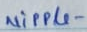

Feature Vector: [0.5655055642127991, 2.5754594802856445, 0.29904019832611084, 0.0963442474603653, 0.6934561729431152, 0.8686774373054504, 0.3913804590702057, 0.08717745542526245, 0.4879520535469055, 0.13540348410606384, 0.047472137957811356, 0.13444778323173523, 0.07636623084545135, 0.015606796368956566, 0.36301717162132263, 0.20511260628700256, 0.28868767619132996, 0.025653362274169922, 0.18306933343410492, 0.11291339248418808, 0.09162887185811996, 0.05094445124268532, 0.0017992296488955617, 1.3933700323104858, 0.2868089973926544, 0.1009320467710495, 0.16551077365875244, 0.24242879450321198, 0.04120561480522156, 0.05534371733665466, 0.27703312039375305, 1.216308832168579, 0.04128801450133324, 0.05760028585791588, 0.13275322318077087, 0.021236196160316467, 0.7464485168457031, 0.3053111732006073, 0.08648545295000076, 0.2132723480463028, 0.7135739922523499, 0.2602993845939636, 0.18090011179447174, 0.0028637994546443224, 0.064254991710186, 0.0772174745798111, 0.29327651858329773, 0.672992

Feature Vector: [0.4972430169582367, 2.6651151180267334, 0.04013850912451744, 0.0, 0.2712288796901703, 0.7492696046829224, 0.2084072232246399, 0.009930446743965149, 1.1866586208343506, 0.033413540571928024, 0.009164802730083466, 0.2469761073589325, 0.25339603424072266, 0.010224130935966969, 0.3971060514450073, 0.007962639443576336, 0.27957120537757874, 0.04038021340966225, 0.10065879672765732, 0.022427795454859734, 0.053956273943185806, 0.052447378635406494, 0.1640160083770752, 2.431467294692993, 0.2920321524143219, 0.6591720581054688, 0.0733378455042839, 0.0214918851852417, 0.04741813614964485, 0.2098640501499176, 0.40460485219955444, 1.1369365453720093, 0.09172214567661285, 0.3368358314037323, 0.22401468455791473, 0.17987418174743652, 0.045871470123529434, 0.2442745864391327, 0.006430329289287329, 0.9111458659172058, 1.0362145900726318, 0.23542100191116333, 0.21981921792030334, 0.03388526663184166, 0.020195094868540764, 0.42243465781211853, 0.17669594287872314, 1.1177096366882324, 0.

Feature Vector: [0.5572666525840759, 3.0323538780212402, 0.12064188718795776, 0.001876209513284266, 0.6697771549224854, 0.76519775390625, 0.19069033861160278, 0.016669731587171555, 0.5279101729393005, 0.039531562477350235, 0.04872344434261322, 0.16726061701774597, 0.0491776280105114, 1.807237094908487e-05, 0.4589506983757019, 0.04538588225841522, 0.4010680019855499, 0.003228612942621112, 0.3154818117618561, 0.16776423156261444, 0.0538383424282074, 0.046875763684511185, 0.03495895490050316, 1.8223389387130737, 0.5502124428749084, 0.39298108220100403, 0.06622437387704849, 0.39423882961273193, 0.030866915360093117, 0.09683007746934891, 0.45554113388061523, 0.9707787036895752, 0.058473289012908936, 0.0495661124587059, 0.22731570899486542, 0.005008293781429529, 0.30555838346481323, 0.19331324100494385, 0.09809253364801407, 0.39191728830337524, 0.7352309226989746, 0.27970433235168457, 0.33392977714538574, 0.0038715798873454332, 0.0491708405315876, 0.26983529329299927, 0.23055483400821686, 0.

Feature Vector: [0.22318865358829498, 3.4688117504119873, 0.07238075137138367, 0.0, 0.48549944162368774, 0.616649866104126, 0.21067824959754944, 0.055393967777490616, 0.3313080668449402, 0.03522765263915062, 0.05165484920144081, 0.14528420567512512, 0.21460525691509247, 0.021978383883833885, 0.22202008962631226, 0.04217848926782608, 0.29414695501327515, 0.028690211474895477, 0.10067290812730789, 0.07860702276229858, 0.023114949464797974, 0.07803718745708466, 0.0038459766656160355, 1.2417570352554321, 0.3996919095516205, 0.267426073551178, 0.11028460413217545, 0.17345699667930603, 0.07318457961082458, 0.173336461186409, 0.11749957501888275, 0.9256031513214111, 0.05930788815021515, 0.08610472083091736, 0.0486929789185524, 0.05185005068778992, 0.1865580826997757, 0.21068927645683289, 0.13864757120609283, 0.5315747857093811, 0.7173540592193604, 0.17992952466011047, 0.0878336951136589, 0.01191948913037777, 0.07638861238956451, 0.09788888692855835, 0.18090495467185974, 0.6779948472976685, 0.

Feature Vector: [0.24426335096359253, 1.5863832235336304, 0.01939316838979721, 0.006223443895578384, 0.021668165922164917, 0.11926151812076569, 0.2847358286380768, 0.046265941113233566, 1.8053436279296875, 0.28041210770606995, 0.044079557061195374, 0.13007263839244843, 0.15375904738903046, 0.03510037064552307, 0.08790461719036102, 0.005330656189471483, 0.04676453769207001, 0.20397797226905823, 0.07808228582143784, 0.04315292462706566, 0.0991201400756836, 0.4296764135360718, 0.07506155222654343, 1.3636566400527954, 0.6596559286117554, 0.15498308837413788, 0.06375162303447723, 0.1279839426279068, 0.41206610202789307, 0.5378478765487671, 0.2012912780046463, 0.6692136526107788, 0.009927117265760899, 0.09834489226341248, 0.6365953683853149, 0.23043467104434967, 0.05903110280632973, 0.06198961287736893, 0.2822907865047455, 1.1177356243133545, 0.30168434977531433, 0.04844314232468605, 0.7097578048706055, 0.22244012355804443, 0.0013834809651598334, 0.5292165875434875, 0.3096024692058563, 1.053

Feature Vector: [0.28256291151046753, 2.578829288482666, 0.10602381825447083, 0.00141352997161448, 0.3535458445549011, 0.10932671278715134, 0.2664971947669983, 0.020767265930771828, 0.7331365346908569, 0.4132809042930603, 0.05184176564216614, 0.08431755751371384, 0.0846828818321228, 0.014857265166938305, 0.22356142103672028, 0.08044533431529999, 0.30249154567718506, 0.0400531180202961, 0.18118035793304443, 0.04518159106373787, 0.04188904911279678, 0.17041334509849548, 0.015394194051623344, 1.1775541305541992, 0.14659355580806732, 0.5784640908241272, 0.010892990045249462, 0.09083674848079681, 0.1477159559726715, 0.0, 0.2719583213329315, 0.825239360332489, 0.08089350163936615, 0.15008533000946045, 0.20225180685520172, 0.08668685704469681, 0.22396105527877808, 0.1496981978416443, 0.1196354478597641, 0.4354807734489441, 1.0074962377548218, 0.17753912508487701, 0.10949275642633438, 0.007497833576053381, 0.11246418207883835, 0.33723169565200806, 0.15779095888137817, 0.7172541618347168, 0.019

Feature Vector: [0.4182530641555786, 2.365172863006592, 0.03645975887775421, 0.008022804744541645, 0.306011438369751, 0.346573144197464, 0.10136108100414276, 0.013987713493406773, 0.6008337736129761, 0.014395884238183498, 0.05931580439209938, 0.06595662981271744, 0.10297803580760956, 0.03557596728205681, 0.27281972765922546, 0.014504403807222843, 0.3153213858604431, 0.027683185413479805, 0.15100282430648804, 0.025431526824831963, 0.02354639396071434, 0.14206217229366302, 0.0007742464076727629, 1.2466955184936523, 0.24954992532730103, 0.27326783537864685, 0.07077086716890335, 0.10094434022903442, 0.061710577458143234, 0.04019961506128311, 0.1647084355354309, 1.3000695705413818, 0.0058551267720758915, 0.1634150892496109, 0.13883820176124573, 0.013620172627270222, 0.4052983522415161, 0.1321423351764679, 0.015551324002444744, 0.1242145448923111, 1.0426656007766724, 0.28644412755966187, 0.15830616652965546, 0.003430316923186183, 0.0934140533208847, 0.12053041905164719, 0.26468944549560547, 

Feature Vector: [0.2667829990386963, 2.352879047393799, 0.07737031579017639, 0.029678840190172195, 0.3209255039691925, 0.4592084288597107, 0.21581000089645386, 0.037175025790929794, 0.5297148823738098, 0.031857047230005264, 0.0, 0.2115044742822647, 0.14245349168777466, 0.10939391702413559, 0.11847175657749176, 0.19446080923080444, 0.08260885626077652, 0.053143538534641266, 0.29343196749687195, 0.13063675165176392, 0.02895951457321644, 0.08627452701330185, 0.12805260717868805, 0.9525108933448792, 0.1942088007926941, 0.03509054332971573, 0.08116134256124496, 0.007027000188827515, 0.07830110192298889, 0.09870688617229462, 0.40382182598114014, 1.0760164260864258, 0.021170372143387794, 0.252579927444458, 0.2746882140636444, 0.12233822792768478, 0.22382311522960663, 0.11035550385713577, 0.10773938149213791, 0.13143737614154816, 0.6564323306083679, 0.3228243291378021, 0.03761017695069313, 0.052901796996593475, 0.06100364029407501, 0.11602818965911865, 0.13576649129390717, 0.8028448224067688, 

Feature Vector: [0.944018542766571, 0.946064829826355, 0.346955269575119, 0.02383880317211151, 0.2217179536819458, 0.4746992886066437, 0.20878168940544128, 0.10228808224201202, 1.05743408203125, 0.20855195820331573, 0.019314294680953026, 0.5102372169494629, 0.38836732506752014, 0.24983659386634827, 0.3047642707824707, 0.03775717318058014, 0.33940452337265015, 0.15268346667289734, 0.21594484150409698, 0.03797747194766998, 0.15443508327007294, 0.10506659001111984, 0.12994761765003204, 1.6020548343658447, 0.244184672832489, 0.4466055929660797, 0.030074967071413994, 0.3658083379268646, 0.07724951952695847, 0.3224479556083679, 0.320239394903183, 1.263258934020996, 0.053146325051784515, 0.03214280679821968, 0.30135971307754517, 0.3224688172340393, 0.22074268758296967, 0.09019273519515991, 0.07218089699745178, 0.2582976222038269, 0.9429075121879578, 0.15117564797401428, 0.17499713599681854, 0.08708859235048294, 0.05602922663092613, 0.17946816980838776, 0.4888265132904053, 1.909897804260254, 0

Feature Vector: [0.2039027363061905, 3.8570661544799805, 0.07589690387248993, 0.012877805158495903, 0.25175178050994873, 0.35795748233795166, 0.0784793272614479, 0.014736800454556942, 0.9872466325759888, 0.043794456869363785, 0.05139902979135513, 0.25855013728141785, 0.06189223751425743, 0.04082722216844559, 0.06089010089635849, 0.014183351770043373, 0.248369961977005, 0.04346952587366104, 0.03419554606080055, 0.04712284728884697, 0.06909346580505371, 0.1282951831817627, 0.02494669519364834, 1.1390923261642456, 0.5982040762901306, 0.18480442464351654, 0.011909820139408112, 0.22128494083881378, 0.05281573906540871, 0.17163777351379395, 0.22200724482536316, 1.0571569204330444, 0.08192408829927444, 0.0627097487449646, 0.04264500364661217, 0.07827386260032654, 0.33832159638404846, 0.3999740481376648, 0.051652178168296814, 0.29080939292907715, 0.6766023635864258, 0.11767604202032089, 0.10239563137292862, 0.043732259422540665, 0.021824123337864876, 0.13054409623146057, 0.06889159977436066, 0

Feature Vector: [0.34779635071754456, 3.2717695236206055, 0.06597185879945755, 0.027454616501927376, 0.4828742742538452, 0.5518184304237366, 0.11665961891412735, 0.00434540119022131, 0.4020726978778839, 0.1001383364200592, 0.0770576223731041, 0.1801096796989441, 0.2183203548192978, 0.030715109780430794, 0.200511634349823, 0.028945520520210266, 0.366497278213501, 0.03403554484248161, 0.0836331695318222, 0.06648597121238708, 0.04105512052774429, 0.0970533937215805, 0.0032875877805054188, 1.4576421976089478, 0.45591333508491516, 0.4637686014175415, 0.054372455924749374, 0.19359683990478516, 0.05539805442094803, 0.10160338133573532, 0.2976819574832916, 1.144783854484558, 0.072971872985363, 0.15338987112045288, 0.07758493721485138, 0.19337210059165955, 0.23264624178409576, 0.25232040882110596, 0.11202985048294067, 0.5830756425857544, 0.5560571551322937, 0.27478525042533875, 0.16346487402915955, 0.02063058316707611, 0.11118338257074356, 0.15923835337162018, 0.30398115515708923, 1.02590703964

Feature Vector: [0.3703155517578125, 3.632316827774048, 0.043860938400030136, 0.03696319833397865, 0.2868853211402893, 0.49255985021591187, 0.2123671919107437, 0.029686586931347847, 0.4779067933559418, 0.02123553864657879, 0.04179326444864273, 0.23118837177753448, 0.20741349458694458, 0.0063217077404260635, 0.2505039870738983, 0.0357399508357048, 0.3845030665397644, 0.06718946248292923, 0.060405440628528595, 0.04762580618262291, 0.10100524127483368, 0.015698395669460297, 0.00036476735840551555, 1.176628589630127, 0.8217976689338684, 0.2152654230594635, 0.04637827351689339, 0.5848891735076904, 0.042645737528800964, 0.09084188938140869, 0.18452833592891693, 1.5419418811798096, 0.03576330840587616, 0.07640814781188965, 0.16261343657970428, 0.004205598030239344, 0.2727620303630829, 0.3288842439651489, 0.06376027315855026, 0.532753050327301, 0.6232467293739319, 0.14610272645950317, 0.2152116298675537, 0.023594198748469353, 0.0664331316947937, 0.07503828406333923, 0.40757715702056885, 0.4914

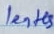

Feature Vector: [0.3553939461708069, 2.313674211502075, 0.15990649163722992, 0.08805548399686813, 0.4738306999206543, 0.3645916283130646, 0.33174756169319153, 0.09122024476528168, 0.35118356347084045, 0.2634108364582062, 0.02925989404320717, 0.09595095366239548, 0.1032269224524498, 0.01876811310648918, 0.31781643629074097, 0.09629131108522415, 0.3400335907936096, 0.04905802384018898, 0.22995597124099731, 0.031355153769254684, 0.04893830418586731, 0.1871630847454071, 0.09665421396493912, 1.1225488185882568, 0.48430874943733215, 0.17169514298439026, 0.001562677789479494, 0.6816174387931824, 0.10311073809862137, 0.1012481078505516, 0.06709962338209152, 1.5267844200134277, 0.08079616725444794, 0.061958253383636475, 0.018238216638565063, 0.04089420288801193, 0.4702257513999939, 0.19512684643268585, 0.08471205085515976, 0.5363810658454895, 0.7566461563110352, 0.15002243220806122, 0.25716665387153625, 0.014688409864902496, 0.03857247903943062, 0.23125921189785004, 0.5299500226974487, 0.568046

Feature Vector: [0.2555207312107086, 3.6352922916412354, 0.046381715685129166, 0.0008268909878097475, 0.20954632759094238, 0.17184878885746002, 0.08730275183916092, 0.0032197595573961735, 0.4858994781970978, 0.04829144850373268, 0.032754309475421906, 0.23674416542053223, 0.16572405397891998, 0.02068190649151802, 0.12529386579990387, 0.009738078340888023, 0.328777015209198, 0.05374055355787277, 0.10424045473337173, 0.04553819075226784, 0.048000920563936234, 0.0017053643241524696, 0.041518956422805786, 1.1251230239868164, 0.5574212670326233, 0.2690604329109192, 0.012084580026566982, 0.40174174308776855, 0.05323440209031105, 0.11962684243917465, 0.20314668118953705, 1.283421277999878, 0.09348112344741821, 0.182546928524971, 0.13940773904323578, 0.04899824783205986, 0.280265748500824, 0.3934756815433502, 0.08591350167989731, 0.4051138162612915, 0.6601425409317017, 0.24990448355674744, 0.2114757001399994, 0.03485897555947304, 0.09039601683616638, 0.12280791252851486, 0.17904889583587646, 0.

Feature Vector: [0.22718745470046997, 3.1635379791259766, 0.04927758872509003, 0.00024508943897672, 0.2827061712741852, 0.27527546882629395, 0.12220367789268494, 0.0, 0.7575761675834656, 0.03611500561237335, 0.040987879037857056, 0.11471475660800934, 0.09789387136697769, 0.007789949886500835, 0.14949524402618408, 0.0038266510237008333, 0.31093835830688477, 0.02502303756773472, 0.01830260083079338, 0.046386029571294785, 0.08385264873504639, 0.0031070751138031483, 0.026777876541018486, 1.6213276386260986, 0.5109537243843079, 0.5094246864318848, 0.011339601129293442, 0.29083338379859924, 0.004040932282805443, 0.04184452444314957, 0.3672010898590088, 1.1381278038024902, 0.10282152891159058, 0.09647031873464584, 0.2038746327161789, 0.03969738632440567, 0.21377894282341003, 0.3542841672897339, 0.12730830907821655, 0.6524199843406677, 0.6891511678695679, 0.20023676753044128, 0.21007728576660156, 0.05920012667775154, 0.05262283235788345, 0.1927161067724228, 0.49069076776504517, 1.0248961448669

Feature Vector: [0.6763901710510254, 3.2290496826171875, 0.046119432896375656, 0.29838380217552185, 0.6985338926315308, 0.3454582393169403, 0.28960537910461426, 0.04611325263977051, 0.3236129879951477, 0.1373348832130432, 0.009910495951771736, 0.09880557656288147, 0.09042676538228989, 0.008376610465347767, 0.20311446487903595, 0.027367250993847847, 0.4850439727306366, 0.030489685013890266, 0.12163016945123672, 0.061241988092660904, 0.12983295321464539, 0.15503035485744476, 0.026742424815893173, 1.0203713178634644, 0.6887335777282715, 0.1088564321398735, 0.01960550993680954, 0.8535294532775879, 0.08211106061935425, 0.048874787986278534, 0.3248378336429596, 1.3511489629745483, 0.009111683815717697, 0.021897953003644943, 0.07048025727272034, 0.009127693250775337, 0.7069567441940308, 0.13038763403892517, 0.11926592886447906, 0.6998371481895447, 0.47259560227394104, 0.17236848175525665, 0.2191045582294464, 0.013573989272117615, 0.08540999889373779, 0.03599610552191734, 0.2840811610221863, 0

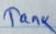

Feature Vector: [0.6860005259513855, 2.14506459236145, 0.06486513465642929, 0.21995413303375244, 0.4035574793815613, 0.5038633942604065, 0.10895378887653351, 0.0, 0.35596564412117004, 0.19521081447601318, 0.032175082713365555, 0.13374193012714386, 0.09016936272382736, 0.014265796169638634, 0.18782629072666168, 0.05675792694091797, 0.17507167160511017, 0.03494963049888611, 0.11782844364643097, 0.06172491982579231, 0.15292662382125854, 0.1798054426908493, 0.035364385694265366, 1.0260955095291138, 0.28239768743515015, 0.19093267619609833, 0.17724817991256714, 0.43322256207466125, 0.08737011253833771, 0.09625991433858871, 0.12891194224357605, 0.8789219856262207, 0.08875839412212372, 0.05807221680879593, 0.10546427965164185, 0.09121476113796234, 0.7329453229904175, 0.193900465965271, 0.19387423992156982, 0.6947222948074341, 0.6798434853553772, 0.30241039395332336, 0.15379439294338226, 0.04406319931149483, 0.1430184245109558, 0.08804358541965485, 0.2224837690591812, 0.38510778546333313, 0.12

Feature Vector: [0.6875811815261841, 1.878527283668518, 0.21218009293079376, 0.009248485788702965, 0.328220397233963, 0.5710545182228088, 0.36786410212516785, 0.09367839992046356, 1.6402640342712402, 0.5530173778533936, 0.006569516845047474, 0.1643017679452896, 0.12475081533193588, 0.05346066132187843, 0.3203430473804474, 0.04358479008078575, 0.1954607218503952, 0.026508063077926636, 0.16976013779640198, 0.08599261939525604, 0.05956004559993744, 0.06690208613872528, 0.29818519949913025, 2.030538558959961, 0.071089006960392, 0.6378272175788879, 0.022959783673286438, 0.029429346323013306, 0.09045600891113281, 0.08509842306375504, 0.4871019721031189, 0.8528102040290833, 0.03539087250828743, 0.017984671518206596, 0.26177752017974854, 0.03905712813138962, 0.10465827584266663, 0.057560332119464874, 0.09346452355384827, 0.3154252767562866, 1.2934138774871826, 0.19786687195301056, 0.2593108117580414, 0.010929988697171211, 0.08340682089328766, 0.21939003467559814, 0.2163206934928894, 1.22065699

In [11]:
import cv2
import torch
import torchvision.transforms as transforms
from torch import nn
from torchvision import models
import json
import time
import easyocr
from google.colab.patches import cv2_imshow

# Ask the user to upload an image
image_path = '/content/drive/MyDrive/OCR/18th Oct, 2023.jpeg'

# Create a reader with the default recognition model for English.
reader = easyocr.Reader(['en'])

print("Default recognition model loaded successfully for English.")

# Read the image.
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Unable to read the image from the path {image_path}.")

print("Image read successfully.")

# Initialize the ResNet model and load pre-trained weights.
resnet = models.resnet50(pretrained=True)
# Remove the final classification layer
resnet = nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()  # Set the model to evaluation mode

# Define a transformation to preprocess the image for ResNet
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Perform OCR on the image.
results = reader.readtext(image)

# Create a list to store the data for each bounding box
data_list = []

# Print bounding box coordinates and words detected, and display the extracted image patches
for i, (bbox, text, prob) in enumerate(results):
    # Convert bounding box coordinates to integers
    bbox = [(int(x), int(y)) for x, y in bbox]

    # Extract the image patch within the bounding box
    x1, y1 = bbox[0]
    x2, y2 = bbox[2]
    patch = image[y1:y2, x1:x2]

    # Display the extracted image patch using cv2_imshow
    cv2_imshow(patch)

    # Preprocess the patch for ResNet
    patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
    patch = preprocess(patch)
    patch = patch.unsqueeze(0)  # Add batch dimension

    # Extract features from the last but one layer of ResNet
    with torch.no_grad():
        features = resnet(patch)

    # Print the extracted feature vector
    print(f"Feature Vector: {features.squeeze().tolist()}")

    # Example usage
    folder_path = '/content/drive/MyDrive/OCR/output_images_data'
    query_vector = features.squeeze().tolist()  # Replace with your actual query vector
    perform_vector_search(folder_path, query_vector)

print("OCR process completed.")


testing hindi

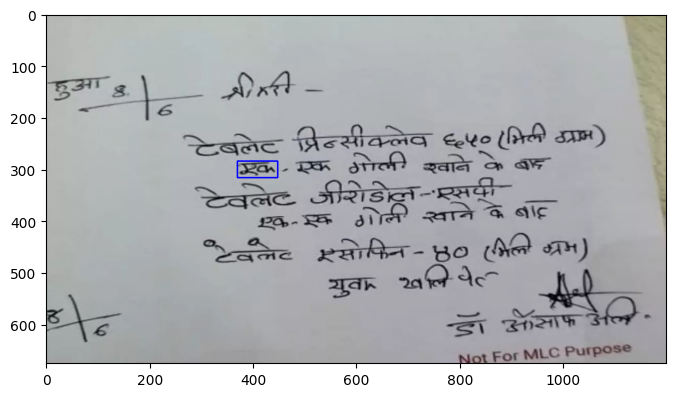

In [ ]:

import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image

rcParams['figure.figsize'] = 8, 16

reader = easyocr.Reader(['en', 'hi'])
file_name = "/content/drive/MyDrive/OCR/parchi1.jpg"
Image(file_name)
output = reader.readtext(file_name)
output
cord = output[4][0]
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
image = cv2.imread(file_name)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(255,0,0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

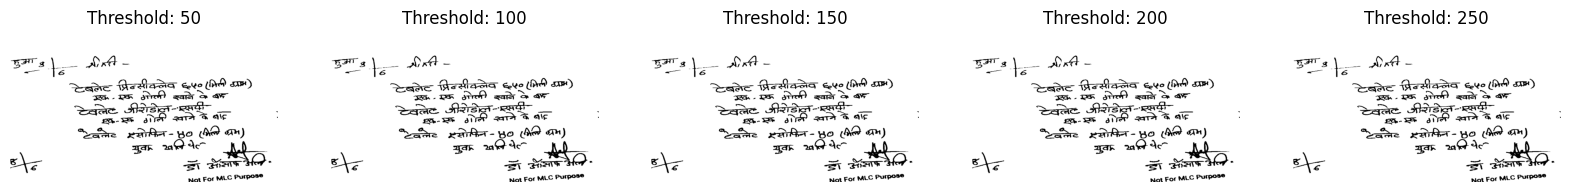

[([[2, 113], [169, 113], [169, 173], [2, 173]], 'रूमा ,', 0.031738000336638976), ([[408, 108], [484, 108], [484, 160], [408, 160]], 'रर', 0.7081186888802808), ([[266, 202], [873, 202], [873, 289], [266, 289]], 'टबलेट प्रिन्सवलेव ९e५०', 0.2234378619338045), ([[980, 208], [1090, 208], [1090, 264], [980, 264]], 'ठ्रम )', 0.4246201576221098), ([[369, 281], [459, 281], [459, 317], [369, 317]], 'Z ', 0.2363061704783096), ([[477, 275], [557, 275], [557, 315], [477, 315]], 'रफक', 0.21512165083053006), ([[572, 257], [892, 257], [892, 321], [572, 321]], 'ठगलम  चवान क', 0.012681907462012922), ([[287, 315], [561, 315], [561, 429], [287, 429]], 'टेवलेट फँ', 0.0783452443611993), ([[498, 297], [921, 297], [921, 426], [498, 426]], 'ओीरेडल्ल त्ेर्रै ', 0.010839505375201201), ([[902, 354], [988, 354], [988, 402], [902, 402]], 'slट', 0.4615609163556728), ([[312, 430], [484, 430], [484, 486], [312, 486]], 'वल्ट', 0.4011121094226837), ([[519, 427], [827, 427], [827, 489], [519, 489]], 'रतपित - ४०', 0.25066

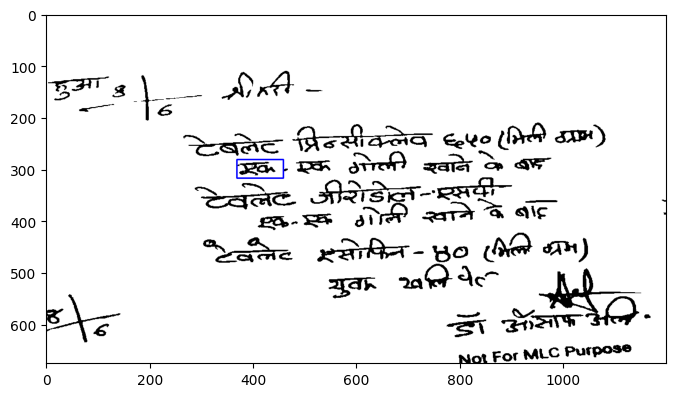

In [ ]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams

# Set the size for matplotlib plot
rcParams['figure.figsize'] = 8, 16

# Initialize the OCR reader
reader = easyocr.Reader(['en', 'hi'])

# Replace with your image path
file_name = "/content/drive/MyDrive/OCR/ParchiSharp.png"

# Read the image
image = cv2.imread(file_name)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying a range of binary thresholds
threshold_values = [50, 100, 150, 200, 250]
fig, axs = plt.subplots(1, len(threshold_values), figsize=(20,5))

for i, thresh in enumerate(threshold_values):
    # Apply binary threshold
    _, thresh_image = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)

    # Display the thresholded image
    axs[i].imshow(cv2.cvtColor(thresh_image, cv2.COLOR_BGR2RGB))
    axs[i].title.set_text(f'Threshold: {thresh}')
    axs[i].axis('off')

plt.show()

# OCR on the original image
output = reader.readtext(file_name)
print(output)

# Highlight the detected area on the original image
cord = output[4][0]
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [9]:
import cv2
import torch
import torchvision.transforms as transforms
from torch import nn
from torchvision import models
import json
import os
import easyocr

# Initialize the ResNet model and load pre-trained weights.
resnet = models.resnet50(pretrained=True)
# Remove the final classification layer
resnet = nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()  # Set the model to evaluation mode

# Define a transformation to preprocess the image for ResNet
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to extract features from an image patch using ResNet
def extract_features(patch):
    # Preprocess the patch for ResNet
    patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
    patch = preprocess(patch)
    patch = patch.unsqueeze(0)  # Add batch dimension

    # Extract features from the last but one layer of ResNet
    with torch.no_grad():
        features = resnet(patch)

    return features.squeeze().tolist()

# Directory containing image files
image_dir = '/content/drive/MyDrive/OCR'

# Directory to save JSON files
json_dir = '/content/drive/MyDrive/OCR/output_images_data'

# Create the output directory if it doesn't exist
os.makedirs(json_dir, exist_ok=True)

# Initialize EasyOCR reader for English
reader = easyocr.Reader(['en'])

# Iterate over all image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Filter image files
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        # Perform OCR on the image
        results = reader.readtext(image)

        # Create a list to store data for each bounding box
        data_list = []

        # Process detected text regions
        for i, (bbox, text, prob) in enumerate(results):
            # Convert bounding box coordinates to integers
            bbox = [(int(x), int(y)) for x, y in bbox]

            # Extract the image patch within the bounding box
            x1, y1 = bbox[0]
            x2, y2 = bbox[2]

            # Check if the extracted patch is empty (has valid coordinates)
            if x1 < x2 and y1 < y2:
                patch = image[y1:y2, x1:x2]

                # Extract features from the patch
                features = extract_features(patch)

                # Create a data entry with text label and features
                data_entry = {
                    "Image source": filename,
                    "Original Text": text,
                    "Feature Vector": features
                }

                data_list.append(data_entry)
            else:
                print(f"Skipping invalid bounding box: {bbox}")

        # Create a JSON file for this image
        json_filename = os.path.splitext(filename)[0] + '.json'
        json_path = os.path.join(json_dir, json_filename)

        with open(json_path, 'w') as json_file:
            json.dump(data_list, json_file)

        print(f"Processed: {image_path} and saved as {json_path}")

print("Data generation completed.")


Processed: /content/drive/MyDrive/OCR/output_images/IMG-20230902-WA0007.jpg and saved as //content/drive/MyDrive/OCR/output_images_data/IMG-20230902-WA0007.json
Processed: /content/drive/MyDrive/OCR/output_images/IMG-20230902-WA0017.jpg and saved as //content/drive/MyDrive/OCR/output_images_data/IMG-20230902-WA0017.json
Processed: /content/drive/MyDrive/OCR/output_images/IMG-20230902-WA0006.jpg and saved as //content/drive/MyDrive/OCR/output_images_data/IMG-20230902-WA0006.json
Processed: /content/drive/MyDrive/OCR/output_images/IMG-20230902-WA0016.jpg and saved as //content/drive/MyDrive/OCR/output_images_data/IMG-20230902-WA0016.json
Processed: /content/drive/MyDrive/OCR/output_images/IMG-20230902-WA0033.jpg and saved as //content/drive/MyDrive/OCR/output_images_data/IMG-20230902-WA0033.json
Processed: /content/drive/MyDrive/OCR/output_images/IMG-20230902-WA0044.jpg and saved as //content/drive/MyDrive/OCR/output_images_data/IMG-20230902-WA0044.json
Processed: /content/drive/MyDrive/

In [7]:
!rm /content/drive/MyDrive/OCR/output_images_data/*
